In [1]:
import pandas as pd
from sqlalchemy import create_engine
import mysql.connector
from mysql.connector import Error

# Define MySQL database connection parameters
mysql_host = 'localhost'
mysql_user = 'samyak'
mysql_password = 'Capt_n3m0'
mysql_db = 'weather_database'

# Define the table creation query
create_table_query = """
CREATE TABLE IF NOT EXISTS weather (
    location_id INT,
    time DATETIME,
    temperature_2m_C FLOAT,
    relative_humidity_2m_percent FLOAT,
    apparent_temperature_C FLOAT,
    precipitation_mm FLOAT,
    weather_code_wmo_code INT,
    wind_speed_10m_kmh FLOAT
)
"""
# Establish a connection to MySQL database
try:
    conn = mysql.connector.connect(
        host=mysql_host,
        user=mysql_user,
        password=mysql_password,
        database=mysql_db
    )
    
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute(create_table_query)
        conn.commit()
        print("Connected to MySQL database and ensured table exists.")

except Error as e:
    print(f"Error: {e}")
    if conn.is_connected():
        conn.close()
    exit()

Connected to MySQL database and ensured table exists.


In [2]:
# Define the insert query
insert_query = """
INSERT INTO weather (location_id, time, temperature_2m_C, relative_humidity_2m_percent,
                     apparent_temperature_C, precipitation_mm, weather_code_wmo_code, wind_speed_10m_kmh)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
"""

In [3]:
# Read weather data in chunks and insert into the database
chunksize = 40000
csv_file_path = 'weather.csv'


In [4]:
for chunk in pd.read_csv(csv_file_path, sep=',',
                         dtype={'location_id': 'int32', 'time': 'string', 'temperature_2m (°C)': 'float32',
                                'relative_humidity_2m (%)': 'float32', 'apparent_temperature (°C)': 'float32',
                                'precipitation (mm)': 'float32', 'weather_code (wmo code)': 'int32',
                                'wind_speed_10m (km/h)': 'float32'}, chunksize=chunksize):

    # Zip the data
    data = list(zip(chunk['location_id'], chunk['time'], chunk['temperature_2m (°C)'],
                    chunk['relative_humidity_2m (%)'], chunk['apparent_temperature (°C)'],
                    chunk['precipitation (mm)'], chunk['weather_code (wmo code)'],
                    chunk['wind_speed_10m (km/h)']))
    
    # Insert data into the database
    try:
        cursor.executemany(insert_query, data)
        conn.commit()
        print('Chunk inserted successfully')
    
    except Error as e:
        print(f"Error: {e}")
        conn.rollback()
        break

# Close the connection
if conn.is_connected():
    conn.close()
print("The weather data was successfully created and loaded!")

# Function to display data from the MySQL database
def display_weather_data():
    try:
        conn = mysql.connector.connect(
            host=mysql_host,
            user=mysql_user,
            password=mysql_password,
            database=mysql_db
        )
        
        if conn.is_connected():
            query = "SELECT * FROM weather"
            df = pd.read_sql(query, conn)
            print("Contents of weather table:")
            print(df)
    
    except Error as e:
        print(f"Error: {e}")
    
    finally:
        if conn.is_connected():
            conn.close()


In [ ]:
# Function to show the structure of the weather table
def show_table_structure():
    try:
        conn = mysql.connector.connect(
            host=mysql_host,
            user=mysql_user,
            password=mysql_password,
            database=mysql_db
        )
        
        if conn.is_connected():
            query = "DESCRIBE weather"
            cursor = conn.cursor()
            cursor.execute(query)
            result = cursor.fetchall()
            weather_table_results = cursor.fetchall()
            print("Structure of weather table:")
            for row in result:
                print(row)
    
    except Error as e:
        print(f"Error: {e}")
    
    finally:
        if conn.is_connected():
            conn.close()

# Call the functions to display the contents and structure of the weather table
display_weather_data()
show_table_structure()

/tmp/ipykernel_59641/2500840988.py:41: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


Contents of weather table:
         location_id                time  temperature_2m_C  \
0                  0 2010-01-01 00:00:00              -2.5   
1                  0 2010-01-01 01:00:00              -2.6   
2                  0 2010-01-01 02:00:00              -2.7   
3                  0 2010-01-01 03:00:00              -2.7   
4                  0 2010-01-01 04:00:00              -2.7   
...              ...                 ...               ...   
1263115            4 2024-05-29 19:00:00              21.3   
1263116            4 2024-05-29 20:00:00              19.6   
1263117            4 2024-05-29 21:00:00              16.9   
1263118            4 2024-05-29 22:00:00              16.1   
1263119            4 2024-05-29 23:00:00              16.0   

         relative_humidity_2m_percent  apparent_temperature_C  \
0                                87.0                    -7.5   
1                                87.0                    -7.5   
2                                

In [ ]:
weather_Code = pd.read_csv("weather_code.csv")

In [ ]:
weather_Code

,location_id,latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation
0,0,52.548330,13.407822,46,7200,Europe/Berlin,CEST
1,1,53.532513,9.980879,11,7200,Europe/Berlin,CEST
2,2,48.119507,11.550000,524,7200,Europe/Berlin,CEST
3,3,50.087870,8.653846,117,7200,Europe/Berlin,CEST
4,4,52.337433,14.500000,28,7200,Europe/Berlin,CEST


In [ ]:
weather_code = pd.DataFrame({
    'location_id': [0, 1, 2, 3, 4],
    'latitude': [52.54833, 53.532513, 48.119507, 50.08787, 52.337433],
    'longitude': [13.407822, 9.980879, 11.55, 8.653846, 14.5],
    'elevation': [34, 45, 30, 28, 50],
    'utc_offset_seconds': [3600, 3600, 3600, 3600, 3600],
    'timezone': ['Europe/Berlin', 'Europe/Berlin', 'Europe/Berlin', 'Europe/Berlin', 'Europe/Berlin'],
    'timezone_abbreviation': ['CEST', 'CEST', 'CEST', 'CEST', 'CEST']
        })

In [ ]:
# Function to determine the place based on coordinates
def get_place(latitude, longitude):
    if latitude == 52.54833 and longitude == 13.407822:
        return 'Berlin'
    elif latitude == 53.532513 and longitude == 9.980879:
        return 'Hamburg'
    elif latitude == 48.119507 and longitude == 11.55:
        return 'Munich'
    elif latitude == 50.08787 and longitude == 8.653846:
        return 'Frankfurt'
    elif latitude == 52.337433 and longitude == 14.5:
        return 'Berlin'
    else:
        return 'Unknown'

# Add the 'place' column
weather_code['Place'] = weather_code.apply(lambda row: get_place(row['latitude'], row['longitude']), axis=1)

# Print the DataFrame to verify the changes
print(weather_code)

   location_id   latitude  longitude  elevation  utc_offset_seconds  \
0            0  52.548330  13.407822         34                3600   
1            1  53.532513   9.980879         45                3600   
2            2  48.119507  11.550000         30                3600   
3            3  50.087870   8.653846         28                3600   
4            4  52.337433  14.500000         50                3600   

        timezone timezone_abbreviation      Place  
0  Europe/Berlin                  CEST     Berlin  
1  Europe/Berlin                  CEST    Hamburg  
2  Europe/Berlin                  CEST     Munich  
3  Europe/Berlin                  CEST  Frankfurt  
4  Europe/Berlin                  CEST     Berlin  


In [ ]:
# Define MySQL database connection parameters
mysql_host = 'localhost'
mysql_user = 'samyak'
mysql_password = 'Capt_n3m0'
mysql_db = 'weather_database'

In [ ]:
# Establish a connection to the MySQL database
try:
    conn = mysql.connector.connect(
        host=mysql_host,
        user=mysql_user,
        password=mysql_password,
        database=mysql_db
    )
    
    if conn.is_connected():
        cursor = conn.cursor()
        
        # Create the weather_code table if it doesn't exist
        cursor.execute('''
            CREATE TABLE IF NOT EXISTS weather_code (
                location_id INT PRIMARY KEY,
                latitude FLOAT NOT NULL,
                longitude FLOAT NOT NULL,
                elevation INT,
                utc_offset_seconds INT,
                timezone VARCHAR(32),
                timezone_abbreviation CHAR(4),
                Place VARCHAR(24)
            )
        ''')
        conn.commit()
        print("Table weather_code created or already exists.")

        # Insert data into the weather_code table
        insert_query = '''
            INSERT INTO weather_code (
                location_id,
                latitude,
                longitude,
                elevation,
                utc_offset_seconds,
                timezone,
                timezone_abbreviation,
                Place
            ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
        '''
        
        for index, row in weather_code.iterrows():
            cursor.execute(insert_query, (
                row['location_id'],
                row['latitude'],
                row['longitude'],
                row['elevation'],
                row['utc_offset_seconds'],
                row['timezone'],
                row['timezone_abbreviation'],
                row['Place']
            ))
        
        conn.commit()
        print("Data inserted into weather_code table successfully.")

except Error as e:
    print(f"Error: {e}")

finally:
    if conn.is_connected():
        cursor.close()
        conn.close()
        print("MySQL connection is closed.")

Table weather_code created or already exists.
Error: 1062 (23000): Duplicate entry '0' for key 'weather_code.PRIMARY'
MySQL connection is closed.


In [ ]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
from datetime import datetime  # Ensure this import statement is present

# Define MySQL database connection parameters
mysql_host = 'localhost'
mysql_user = 'samyak'
mysql_password = 'Capt_n3m0'
mysql_db = 'weather_database'

# Establish a connection to the MySQL database
try:
    conn = mysql.connector.connect(
        host=mysql_host,
        user=mysql_user,
        password=mysql_password,
        database=mysql_db
    )
    
    if conn.is_connected():
        cursor = conn.cursor()

        # Fetch the contents of the weather table
        cursor.execute('SELECT * FROM weather')
        weather_table_results = cursor.fetchall()

        # Save the table data into a variable
        weather_data = weather_table_results
        """
        print("Contents of weather table:")
        for row in weather_table_results:
            # Format datetime
            formatted_row = list(row)
            if isinstance(formatted_row[1], datetime):
                formatted_row[1] = formatted_row[1].strftime('%Y-%m-%d %H:%M:%S')
            print(tuple(formatted_row))
        """

        # Convert the datetime values to strings
        formatted_data = []
        for row in weather_data:
            formatted_row = list(row)
            if isinstance(formatted_row[1], datetime):
                formatted_row[1] = formatted_row[1].strftime('%Y-%m-%d %H:%M:%S')
            formatted_data.append(tuple(formatted_row))
        


        # Create a DataFrame from the formatted data
        df = pd.DataFrame(formatted_data, columns=[
            'location_id', 'time', 'temperature_2m (°C)', 'relative_humidity_2m (%)',
            'apparent_temperature (°C)', 'precipitation (mm)', 'weather_code (wmo code)',
            'wind_speed_10m (km/h)'
        ])

        print("Data fetched successfully.")
        print("DataFrame created successfully.")

        

except Error as e:
    print(f"Error: {e}")

finally:
    if conn.is_connected():
        cursor.close()
        conn.close()
        print("MySQL connection is closed.")


Data fetched successfully.
DataFrame created successfully.
MySQL connection is closed.


In [ ]:
df

,location_id,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),weather_code (wmo code),wind_speed_10m (km/h)
0,0,2010-01-01 00:00:00,-2.5,87.0,-7.5,0.3,73,15.8
1,0,2010-01-01 01:00:00,-2.6,87.0,-7.5,0.4,73,14.8
2,0,2010-01-01 02:00:00,-2.7,88.0,-7.7,0.5,73,16.0
3,0,2010-01-01 03:00:00,-2.7,88.0,-7.8,0.5,73,16.3
4,0,2010-01-01 04:00:00,-2.7,88.0,-7.8,0.4,73,16.3
...,...,...,...,...,...,...,...,...
1263115,4,2024-05-29 19:00:00,21.3,49.0,19.9,0.0,0,9.8
1263116,4,2024-05-29 20:00:00,19.6,59.0,19.0,0.0,2,7.1
1263117,4,2024-05-29 21:00:00,16.9,73.0,16.2,0.0,2,8.7
1263118,4,2024-05-29 22:00:00,16.1,78.0,16.1,0.9,53,4.7


In [ ]:
df.shape

(1263120, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263120 entries, 0 to 1263119
Data columns (total 8 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   location_id                1263120 non-null  int64  
 1   time                       1263120 non-null  object 
 2   temperature_2m (°C)        1263120 non-null  float64
 3   relative_humidity_2m (%)   1263120 non-null  float64
 4   apparent_temperature (°C)  1263120 non-null  float64
 5   precipitation (mm)         1263120 non-null  float64
 6   weather_code (wmo code)    1263120 non-null  int64  
 7   wind_speed_10m (km/h)      1263120 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 77.1+ MB


In [ ]:
df.nunique()

location_id                       5
time                         126312
temperature_2m (°C)             600
relative_humidity_2m (%)         87
apparent_temperature (°C)       659
precipitation (mm)              118
weather_code (wmo code)          13
wind_speed_10m (km/h)           472
dtype: int64

In [ ]:
df['time']=pd.to_datetime(df['time'])
df.head()


,location_id,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),weather_code (wmo code),wind_speed_10m (km/h)
0,0,2010-01-01 00:00:00,-2.5,87.0,-7.5,0.3,73,15.8
1,0,2010-01-01 01:00:00,-2.6,87.0,-7.5,0.4,73,14.8
2,0,2010-01-01 02:00:00,-2.7,88.0,-7.7,0.5,73,16.0
3,0,2010-01-01 03:00:00,-2.7,88.0,-7.8,0.5,73,16.3
4,0,2010-01-01 04:00:00,-2.7,88.0,-7.8,0.4,73,16.3


In [ ]:
loc = df['location_id']

In [ ]:
loc.unique()


array([0, 1, 2, 3, 4])

In [ ]:
loc_id = df['location_id']
def insert_plcae(loc_id):
    if loc_id == '0':
        return 'Berlin'
    elif loc_id == 1:
        return 'Hamburg'
    elif loc_id == 2:
        return 'Munich'
    elif loc_id == 3:
        return 'Frankfurt'
    elif loc_id == 4:
        return 'Frankfurt(oder)'
    else:
        return 'Unknown'
    
# Add the 'Place' column
df['Place'] = weather_code.apply(lambda row: get_place(row['latitude'], row['longitude']), axis=1)
# Create a dictionary for mapping location_id to Place
location_to_place = dict(zip(weather_code['location_id'], weather_code['Place']))

# Add the 'Place' column using the mapping
df['Place'] = df['location_id'].map(location_to_place)



In [ ]:
df

,location_id,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),weather_code (wmo code),wind_speed_10m (km/h),Place
0,0,2010-01-01 00:00:00,-2.5,87.0,-7.5,0.3,73,15.8,Berlin
1,0,2010-01-01 01:00:00,-2.6,87.0,-7.5,0.4,73,14.8,Berlin
2,0,2010-01-01 02:00:00,-2.7,88.0,-7.7,0.5,73,16.0,Berlin
3,0,2010-01-01 03:00:00,-2.7,88.0,-7.8,0.5,73,16.3,Berlin
4,0,2010-01-01 04:00:00,-2.7,88.0,-7.8,0.4,73,16.3,Berlin
...,...,...,...,...,...,...,...,...,...
1263115,4,2024-05-29 19:00:00,21.3,49.0,19.9,0.0,0,9.8,Berlin
1263116,4,2024-05-29 20:00:00,19.6,59.0,19.0,0.0,2,7.1,Berlin
1263117,4,2024-05-29 21:00:00,16.9,73.0,16.2,0.0,2,8.7,Berlin
1263118,4,2024-05-29 22:00:00,16.1,78.0,16.1,0.9,53,4.7,Berlin


In [ ]:
df.nunique()

location_id                       5
time                         126312
temperature_2m (°C)             600
relative_humidity_2m (%)         87
apparent_temperature (°C)       659
precipitation (mm)              118
weather_code (wmo code)          13
wind_speed_10m (km/h)           472
Place                             4
dtype: int64

In [ ]:
def region_analyser(region):
    data=df[df['Place']==region]
    data=data.sort_values('time')
    data=data.reset_index()
    data=data.drop('index',axis=1)
    data=data.drop('Place',axis=1)
    data=data.set_index('time')
    return data

In [ ]:
region_analyser('Berlin')

,location_id,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),weather_code (wmo code),wind_speed_10m (km/h)
time,,,,,,,
2010-01-01 00:00:00,0,-2.5,87.0,-7.5,0.3,73,15.8
2010-01-01 00:00:00,0,-2.5,87.0,-7.5,0.3,73,15.8
2010-01-01 00:00:00,4,-2.7,88.0,-7.8,0.4,73,16.5
2010-01-01 00:00:00,4,-2.7,88.0,-7.8,0.4,73,16.5
2010-01-01 01:00:00,0,-2.6,87.0,-7.5,0.4,73,14.8
...,...,...,...,...,...,...,...
2024-05-29 22:00:00,0,16.5,73.0,15.5,0.0,2,10.1
2024-05-29 23:00:00,4,16.0,83.0,16.0,0.1,51,6.4
2024-05-29 23:00:00,0,16.0,75.0,15.0,0.0,1,9.7


In [ ]:
region_analyser('Hamburg')

,location_id,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),weather_code (wmo code),wind_speed_10m (km/h)
time,,,,,,,
2010-01-01 00:00:00,1,-0.2,81.0,-5.1,0.0,3,15.9
2010-01-01 00:00:00,1,-0.2,81.0,-5.1,0.0,3,15.9
2010-01-01 01:00:00,1,-0.3,83.0,-5.2,0.0,2,15.8
2010-01-01 01:00:00,1,-0.3,83.0,-5.2,0.0,2,15.8
2010-01-01 02:00:00,1,-0.5,84.0,-5.4,0.0,2,16.6
...,...,...,...,...,...,...,...
2024-05-29 21:00:00,1,14.7,89.0,14.8,0.0,1,5.8
2024-05-29 22:00:00,1,13.5,94.0,13.3,0.0,1,6.4
2024-05-29 22:00:00,1,13.5,94.0,13.3,0.0,1,6.4


In [ ]:
region_analyser('Munich')



,location_id,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),weather_code (wmo code),wind_speed_10m (km/h)
time,,,,,,,
2010-01-01 00:00:00,2,-1.8,96.0,-5.2,0.0,0,6.4
2010-01-01 00:00:00,2,-1.8,96.0,-5.2,0.0,0,6.4
2010-01-01 01:00:00,2,-2.4,95.0,-5.9,0.0,0,6.7
2010-01-01 01:00:00,2,-2.4,95.0,-5.9,0.0,0,6.7
2010-01-01 02:00:00,2,-2.8,95.0,-6.5,0.0,0,7.2
...,...,...,...,...,...,...,...
2024-05-29 21:00:00,2,14.2,81.0,12.9,0.3,51,10.9
2024-05-29 22:00:00,2,13.5,84.0,12.5,0.0,1,8.9
2024-05-29 22:00:00,2,13.5,84.0,12.5,0.0,1,8.9


In [ ]:
region_analyser('Frankfurt')

,location_id,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),weather_code (wmo code),wind_speed_10m (km/h)
time,,,,,,,
2010-01-01 00:00:00,3,4.1,99.0,2.1,0.6,53,4.1
2010-01-01 00:00:00,3,4.1,99.0,2.1,0.6,53,4.1
2010-01-01 01:00:00,3,3.8,99.0,1.3,0.4,51,7.1
2010-01-01 01:00:00,3,3.8,99.0,1.3,0.4,51,7.1
2010-01-01 02:00:00,3,3.4,98.0,0.8,0.3,51,6.9
...,...,...,...,...,...,...,...
2024-05-29 21:00:00,3,15.9,81.0,14.5,0.0,2,14.8
2024-05-29 22:00:00,3,15.1,84.0,13.8,0.1,51,14.2
2024-05-29 22:00:00,3,15.1,84.0,13.8,0.1,51,14.2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def feature_analyzer(region,feature,rows):
    data=region_analyser(region)
    
    plt.subplot(2,1,1)
    data[feature].head(rows).plot()
    plt.axhline(data[feature].mean(),color='k',linestyle='--',linewidth=2.5)
    plt.axhline(data[feature].median(),color='g',linestyle='--',linewidth=2.5)
    plt.axhline(data[feature].mode()[0],color='m',linestyle='--',linewidth=3)
    plt.legend()
    plt.grid()
    
    plt.subplot(2,1,2)
    sns.kdeplot(data[feature].head(rows))
    plt.axvline(data[feature].mean(),color='k',linestyle='--',linewidth=2.5)
    plt.axvline(data[feature].median(),color='g',linestyle='--',linewidth=2.5)
    plt.axvline(data[feature].mode()[0],color='m',linestyle='--',linewidth=3)
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()
    

/tmp/ipykernel_59641/1439935403.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


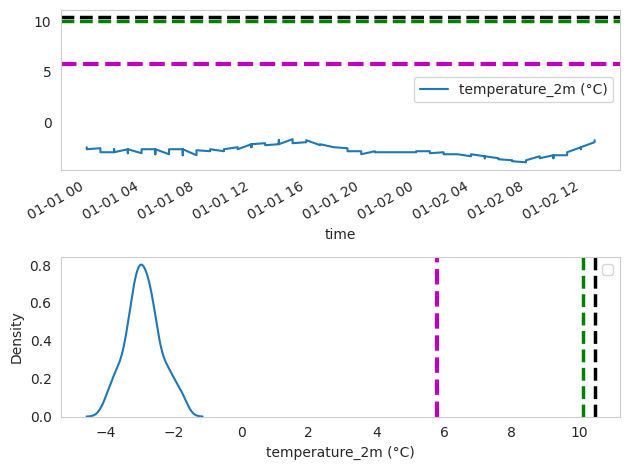

In [ ]:
feature_analyzer('Berlin','temperature_2m (°C)',150)

/tmp/ipykernel_59641/1439935403.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


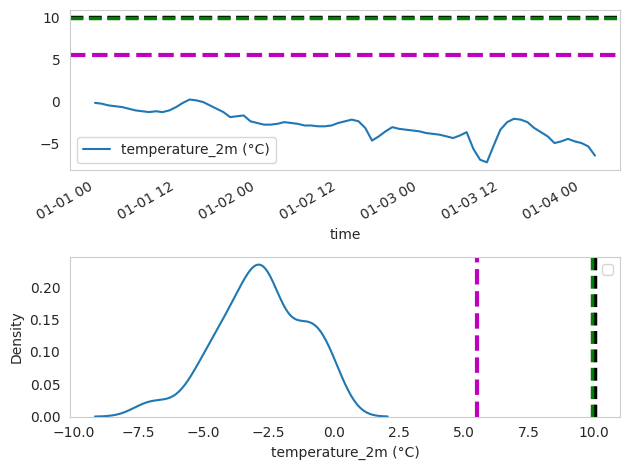

In [ ]:
feature_analyzer('Hamburg','temperature_2m (°C)',150)

/tmp/ipykernel_59641/1439935403.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


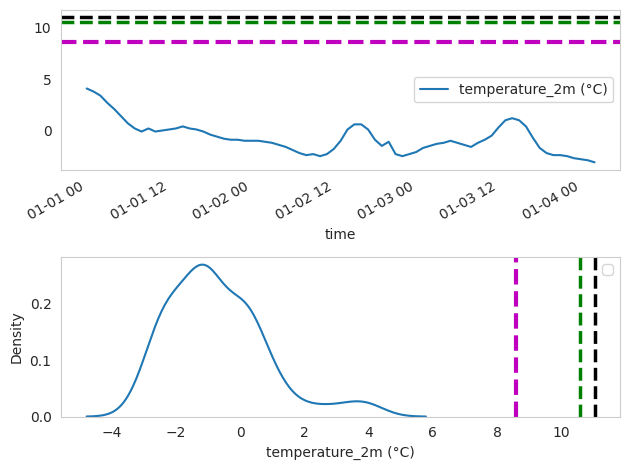

In [ ]:
feature_analyzer('Frankfurt','temperature_2m (°C)',150)

/tmp/ipykernel_59641/1439935403.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


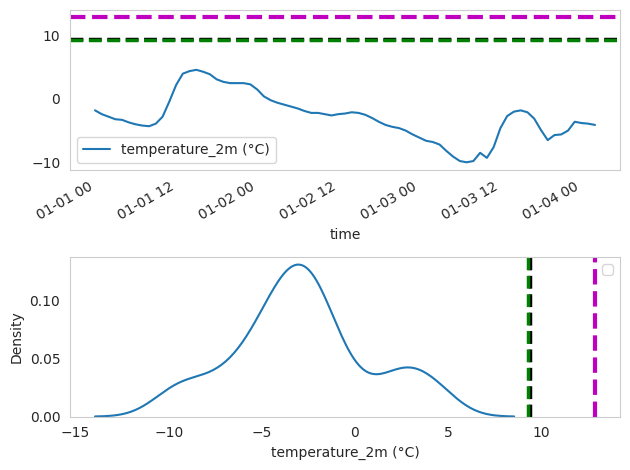

In [ ]:
feature_analyzer('Munich','temperature_2m (°C)',150)

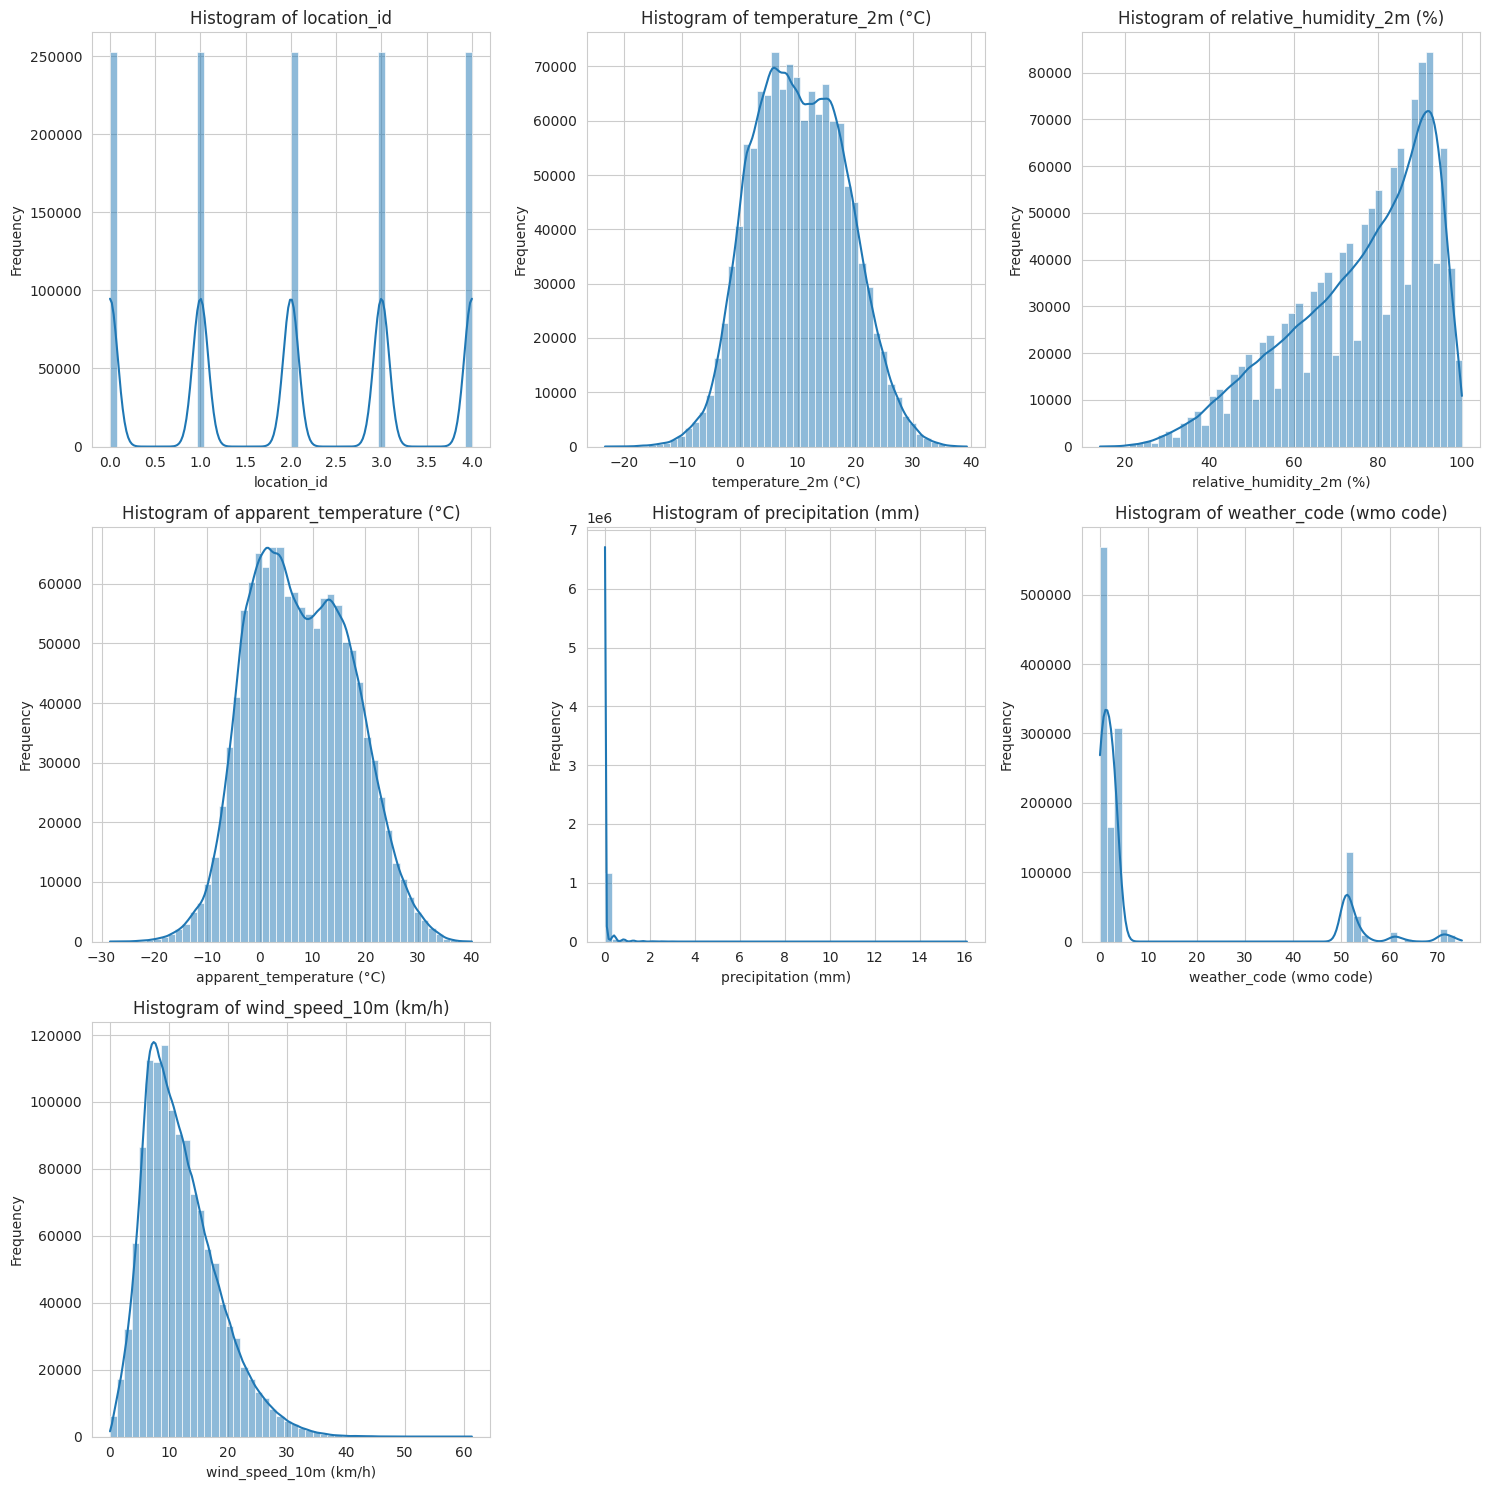

In [ ]:

numerical = df.select_dtypes(include=['float64', 'int64']).columns


num_columns = 3
num_rows = -(-len(numerical) // num_columns)
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))


axes = axes.flatten()

for i, column in enumerate(numerical):
    sns.histplot(df[column], kde=True, bins=50, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



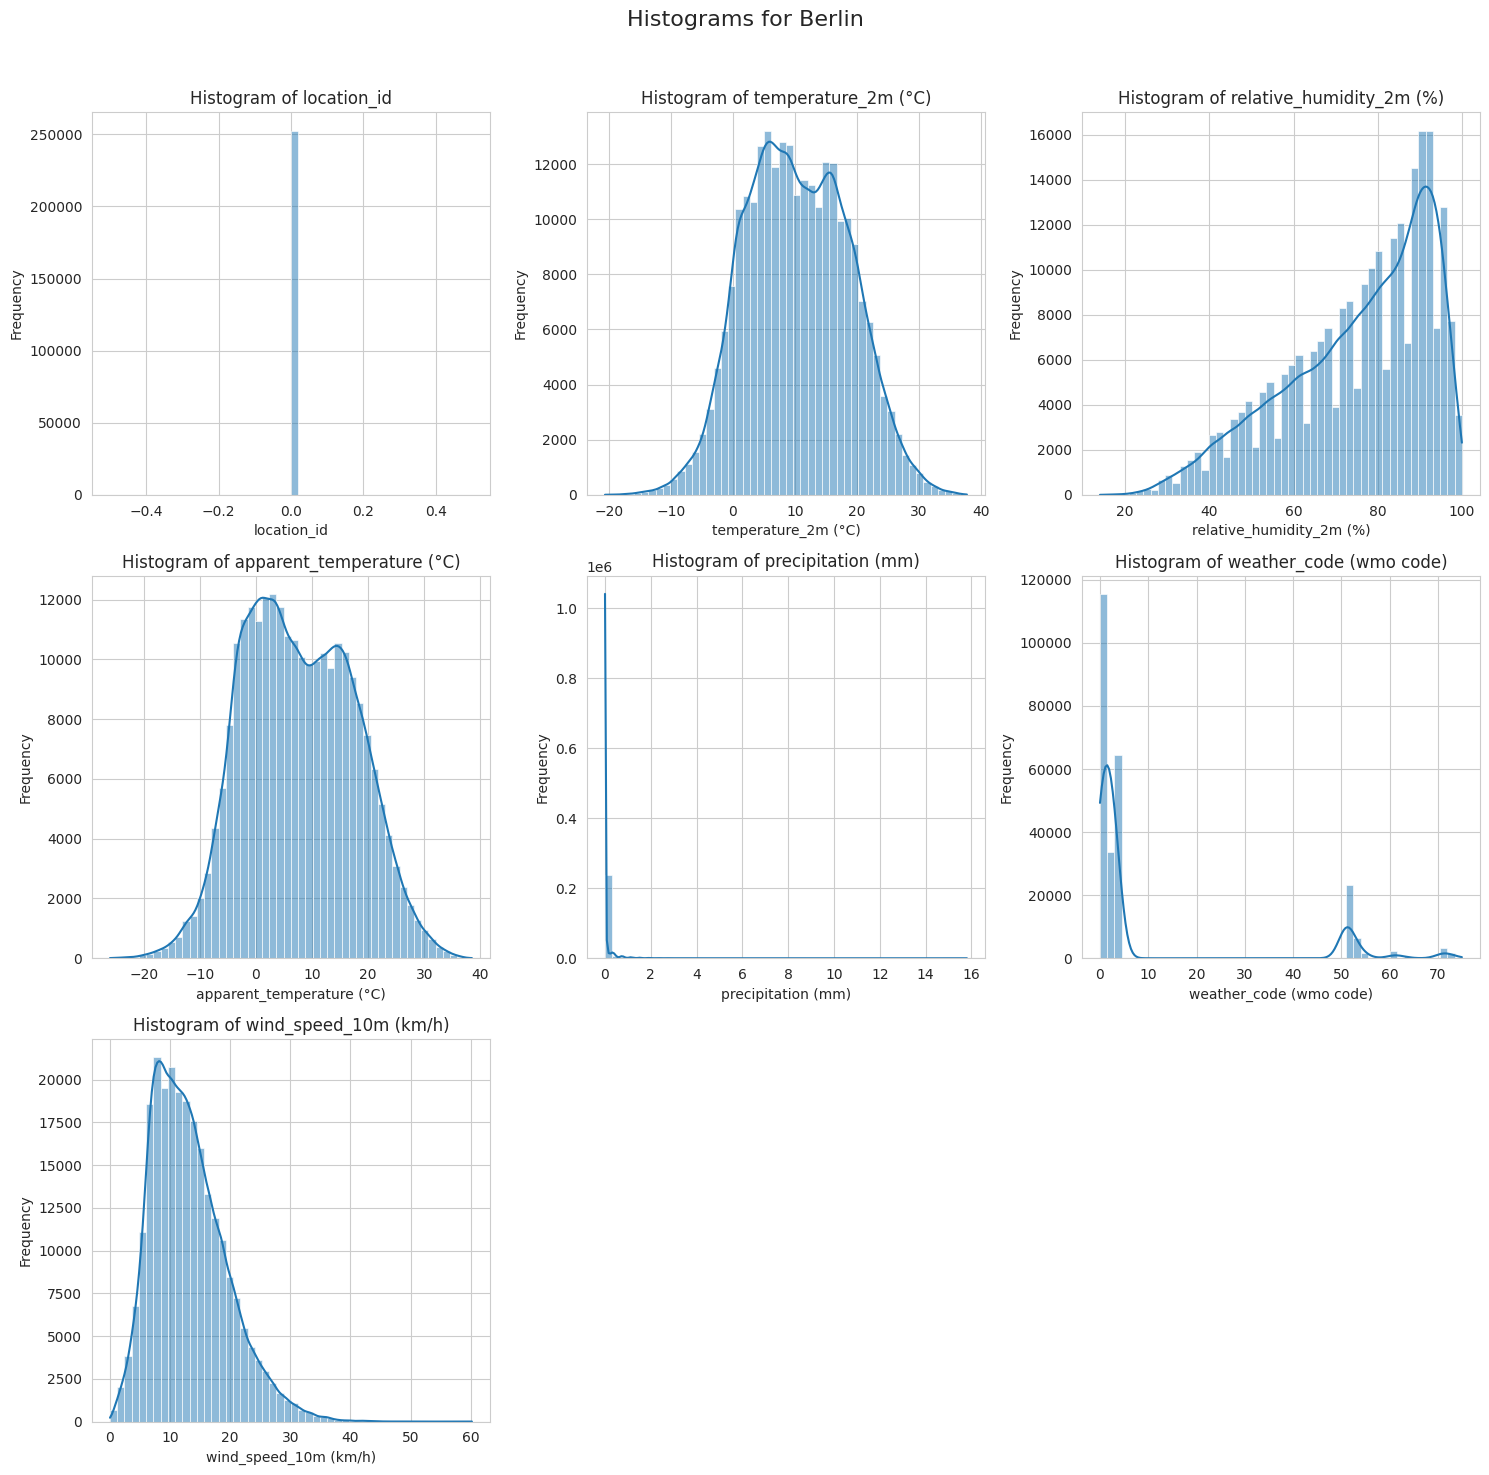

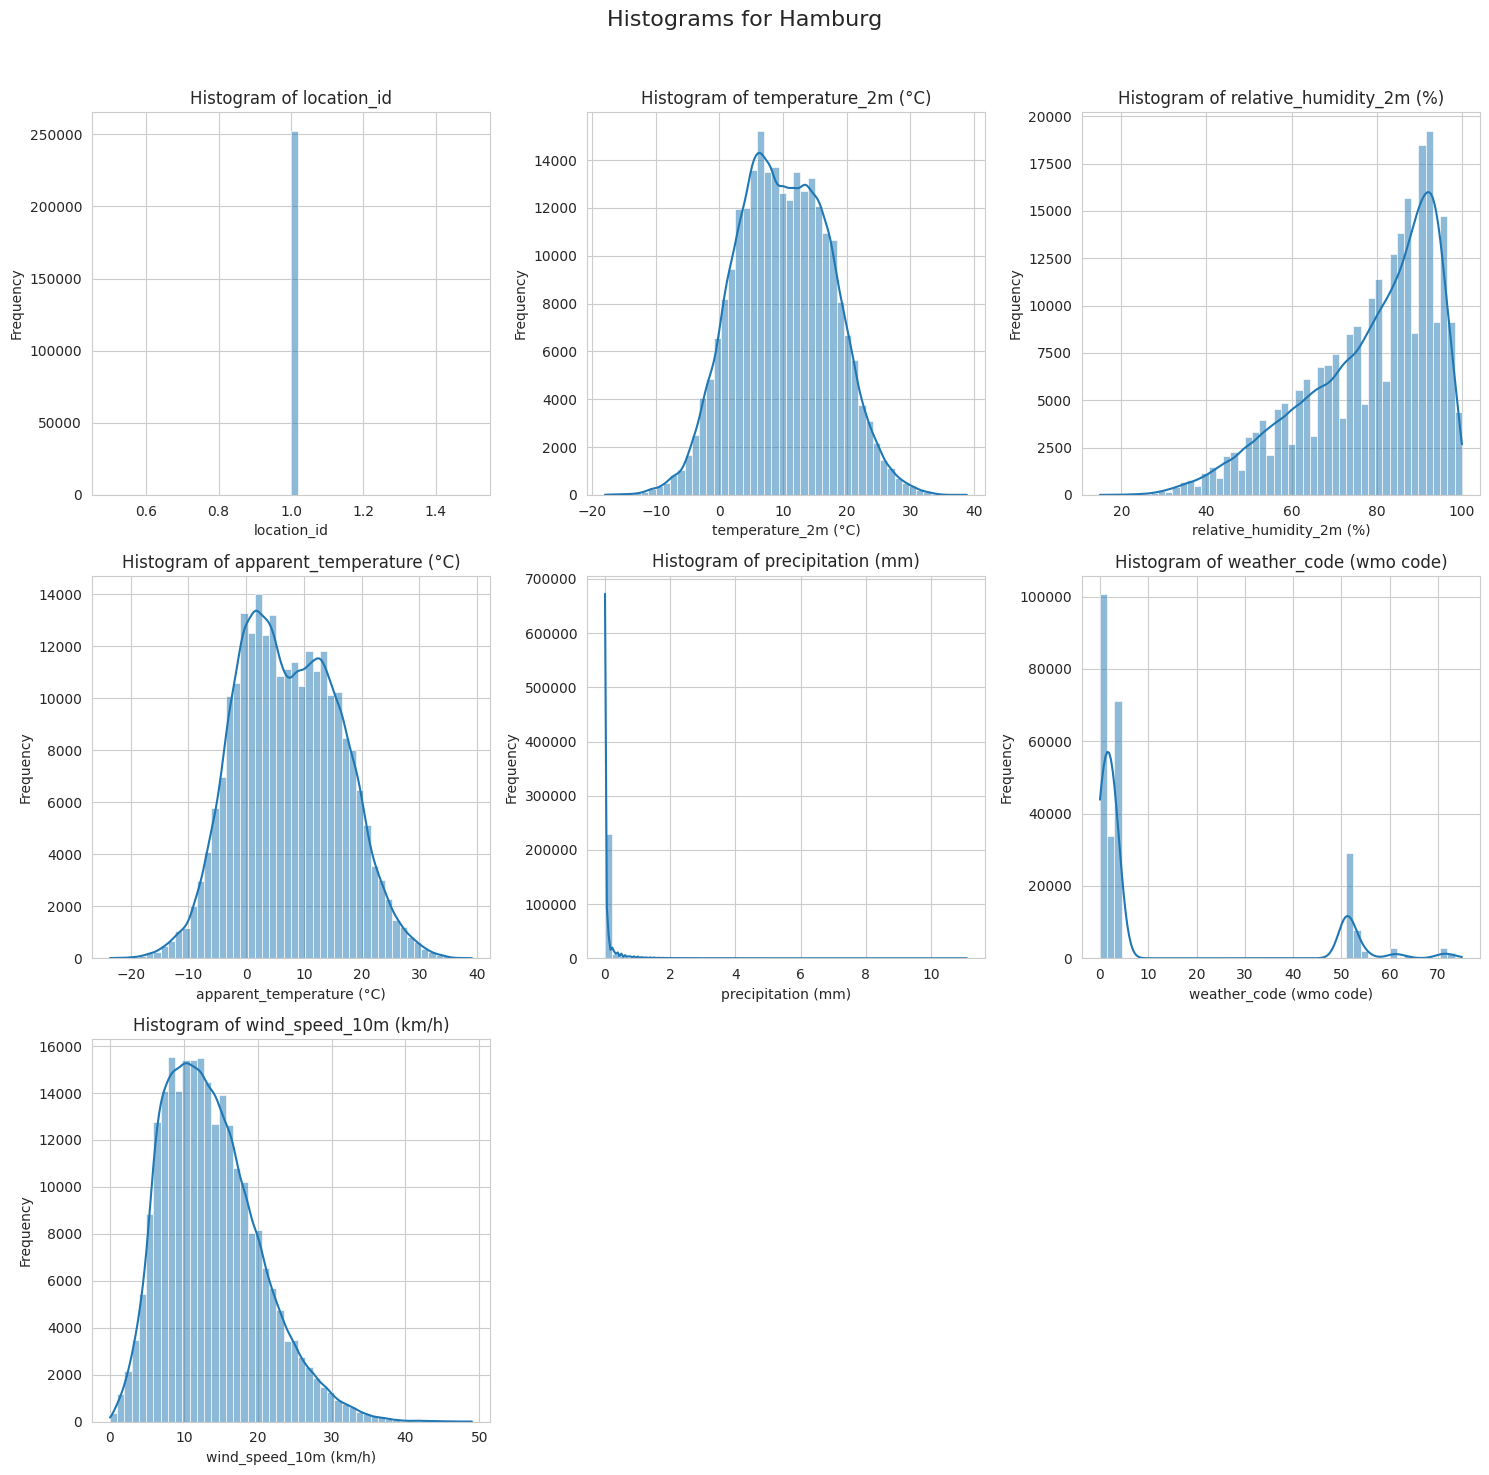

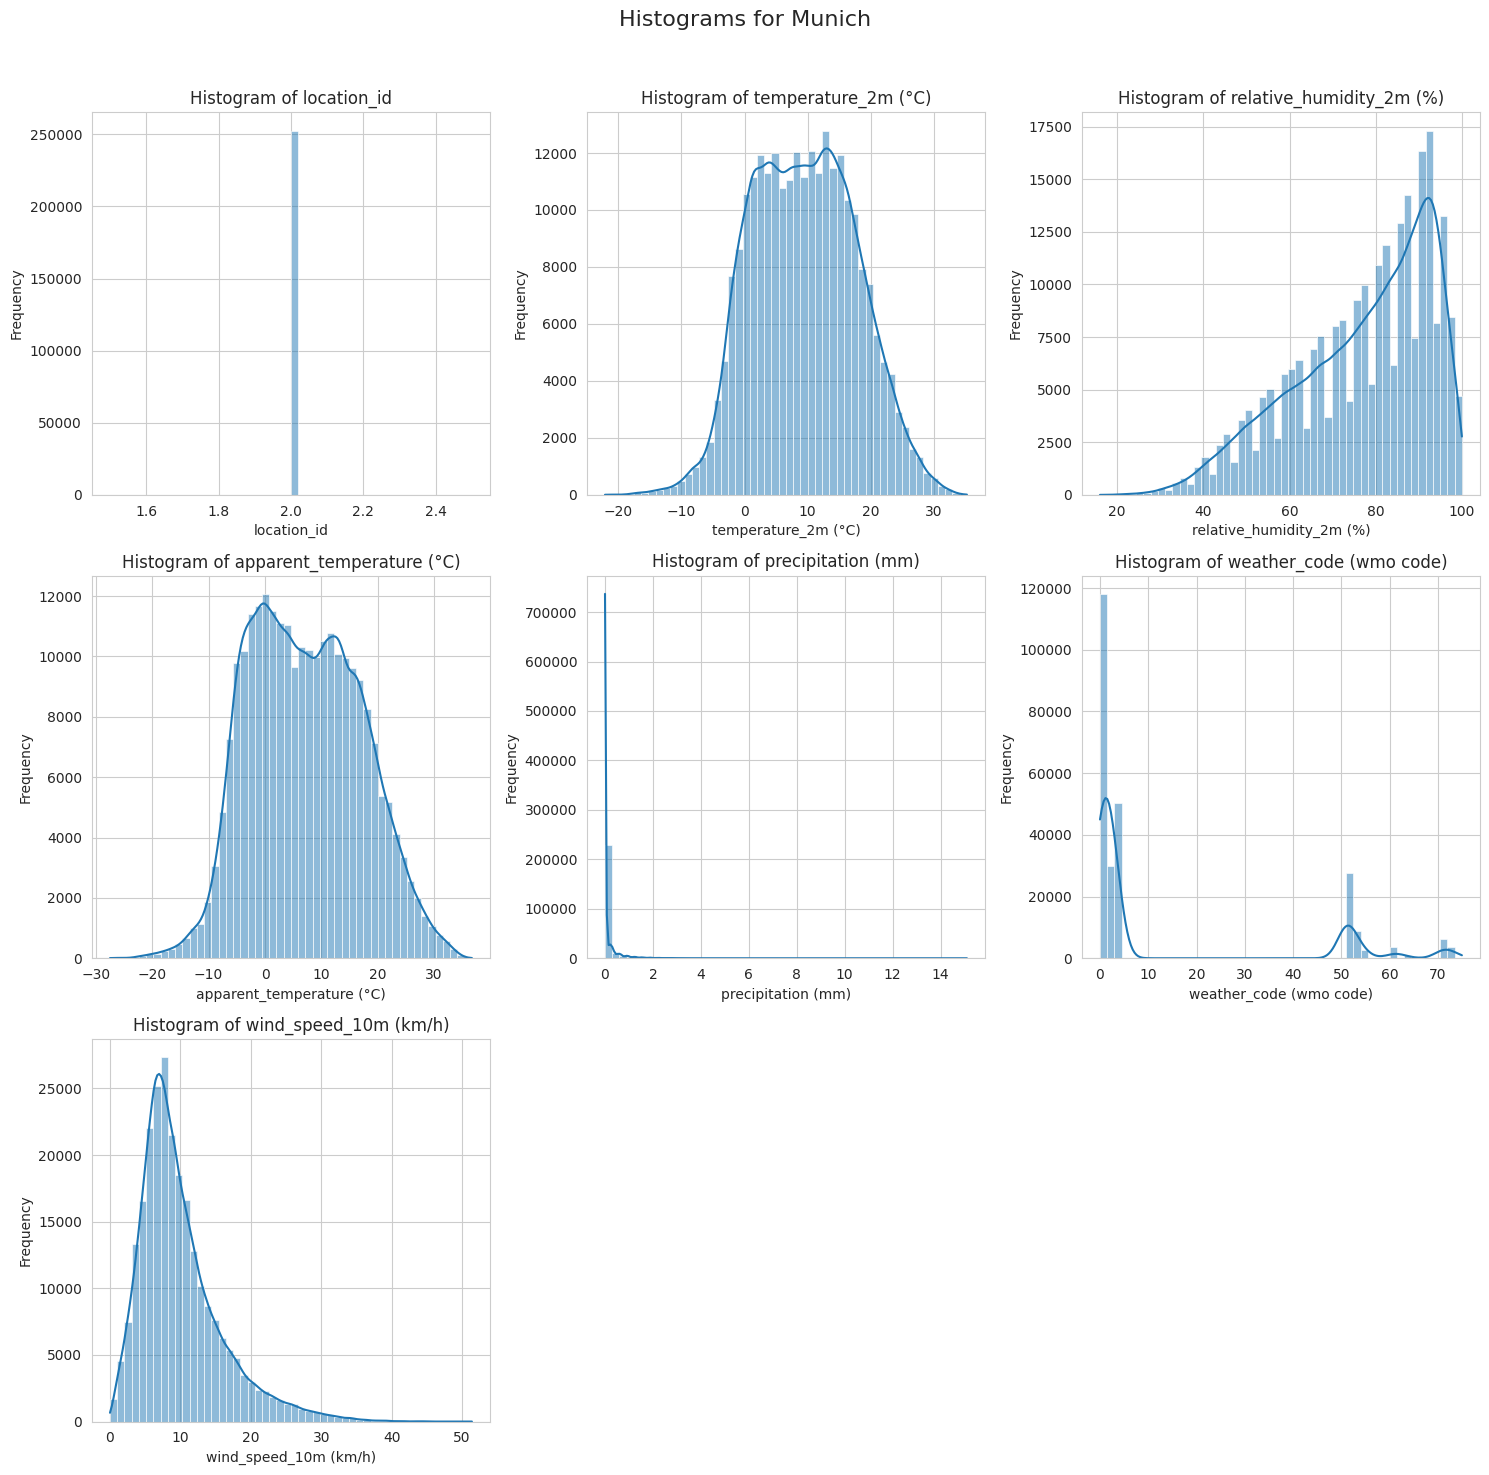

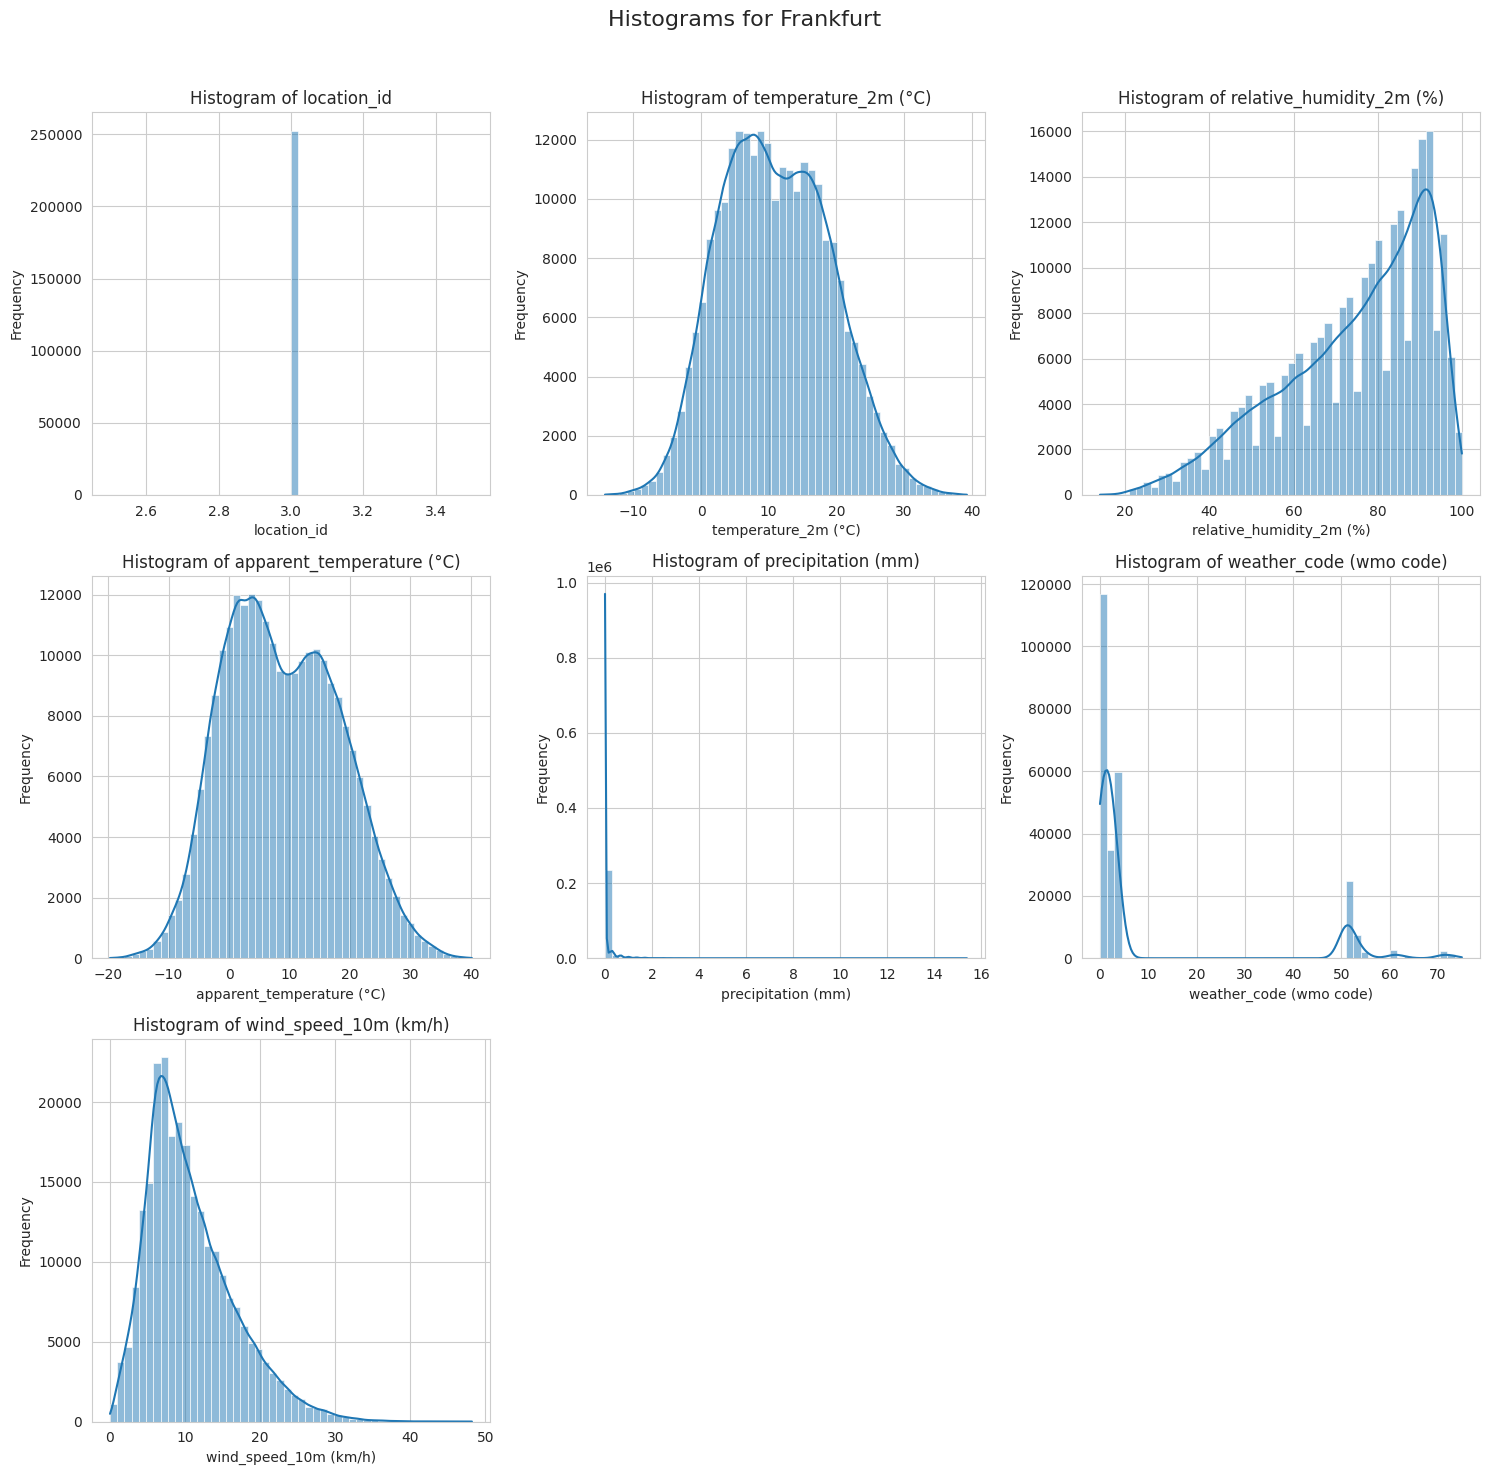

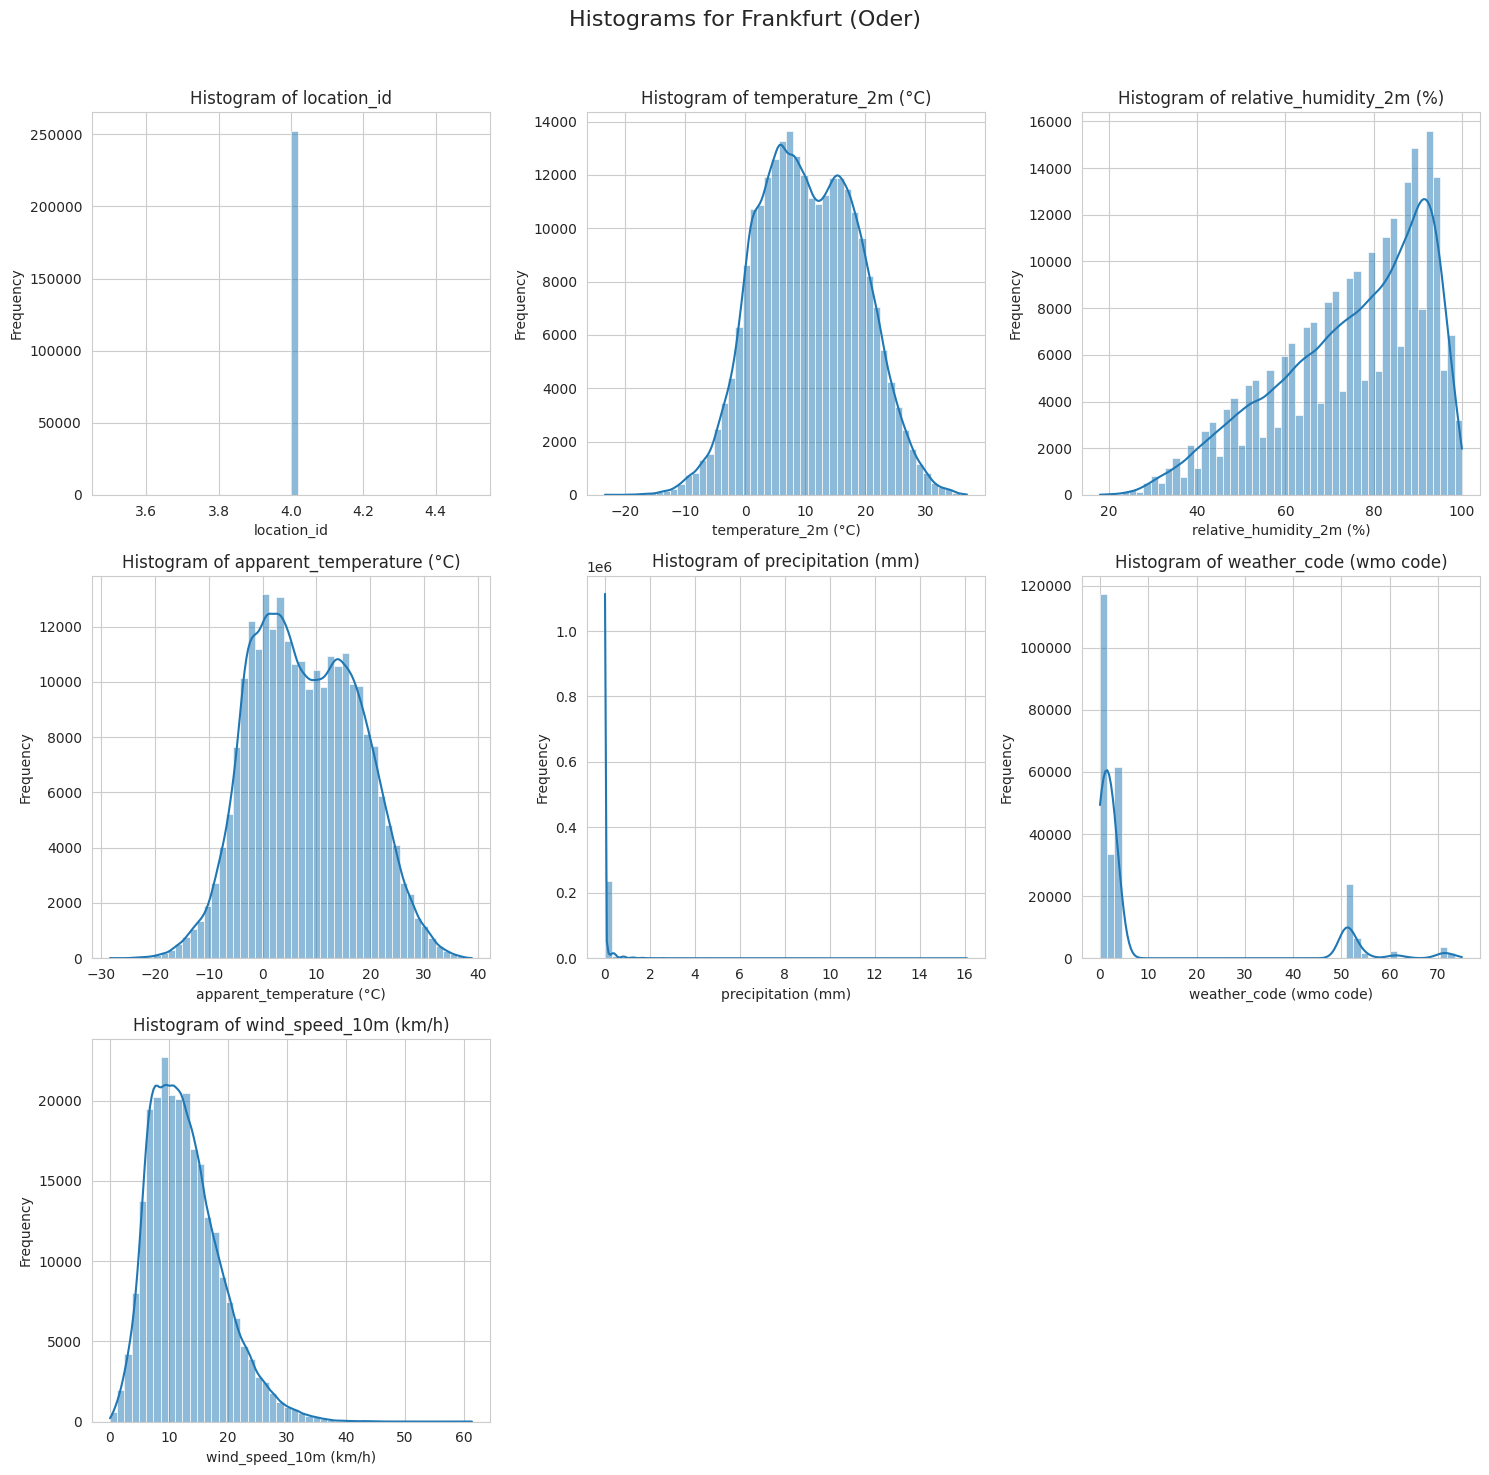

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Function to insert place based on location_id
def insert_place(location_id):
    if location_id == 0:
        return 'Berlin'
    elif location_id == 1:
        return 'Hamburg'
    elif location_id == 2:
        return 'Munich'
    elif location_id == 3:
        return 'Frankfurt'
    elif location_id == 4:
        return 'Frankfurt (Oder)'
    else:
        return 'Unknown'

# Add the 'Place' column using the insert_place function
df['Place'] = df['location_id'].apply(insert_place)

# Select numerical columns
numerical = df.select_dtypes(include=['float64', 'int64']).columns

# Get unique places
unique_places = df['Place'].unique()

# Plot histograms for each place
for place in unique_places:
    df_location = df[df['Place'] == place]
    
    num_columns = len(numerical)
    num_rows = (num_columns + 2) // 3
    
    fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
    fig.suptitle(f'Histograms for {place}', fontsize=16)
    
    for i, column in enumerate(numerical):
        row = i // 3
        col = i % 3
        sns.histplot(df_location[column], kde=True, bins=50, ax=axes[row, col])
        axes[row, col].set_title(f'Histogram of {column}')
        axes[row, col].set_xlabel(column)
        axes[row, col].set_ylabel('Frequency')
    
    # Hide any empty subplots
    for j in range(i + 1, num_rows * 3):
        fig.delaxes(axes.flatten()[j])
    
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the suptitle
    plt.show()


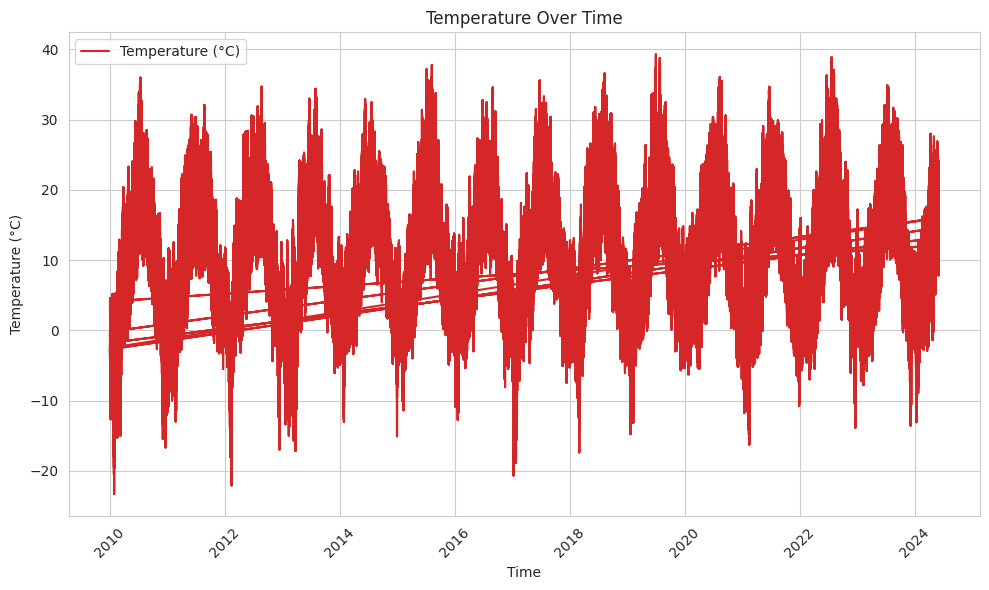

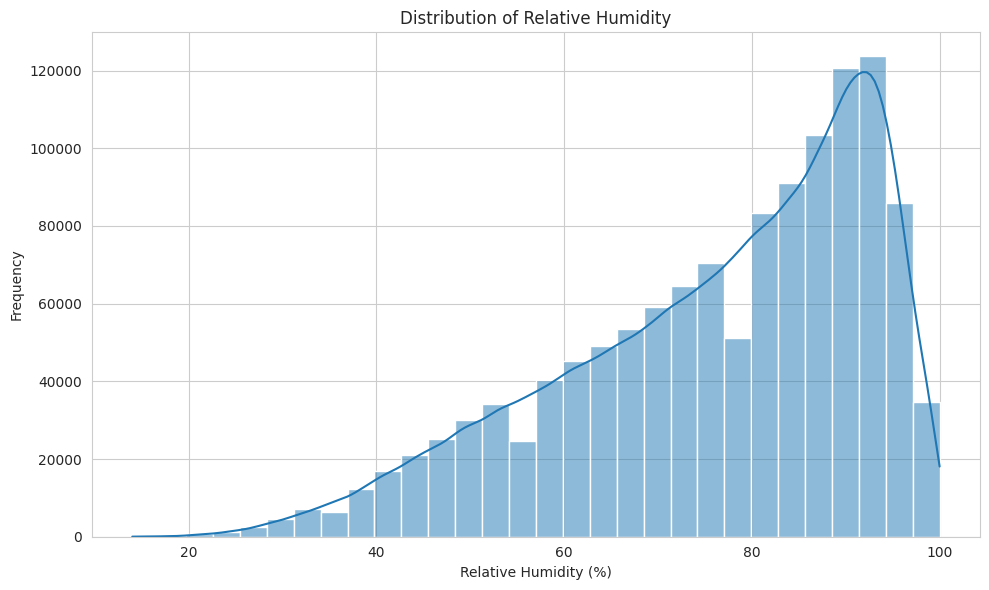

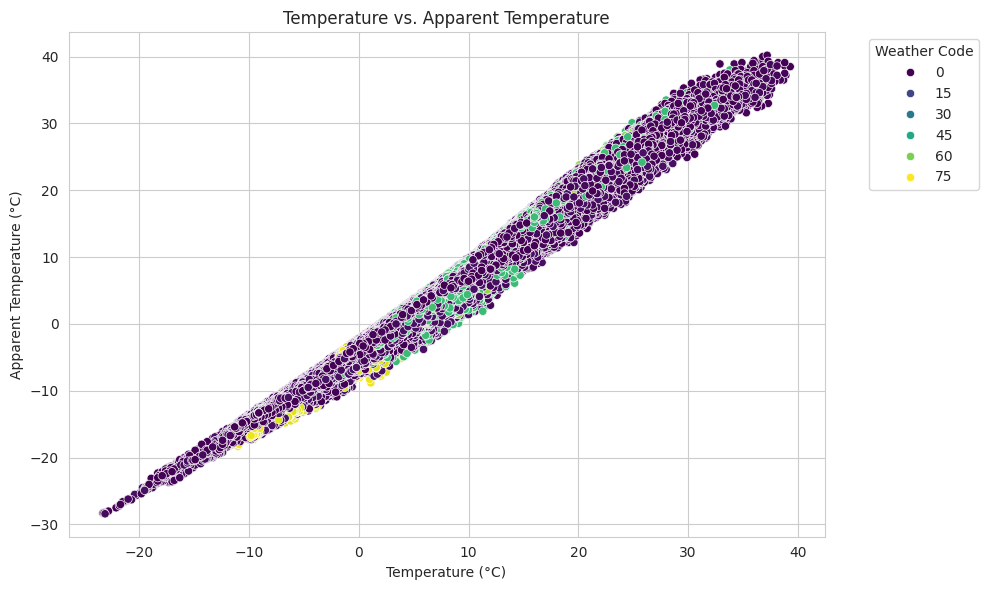

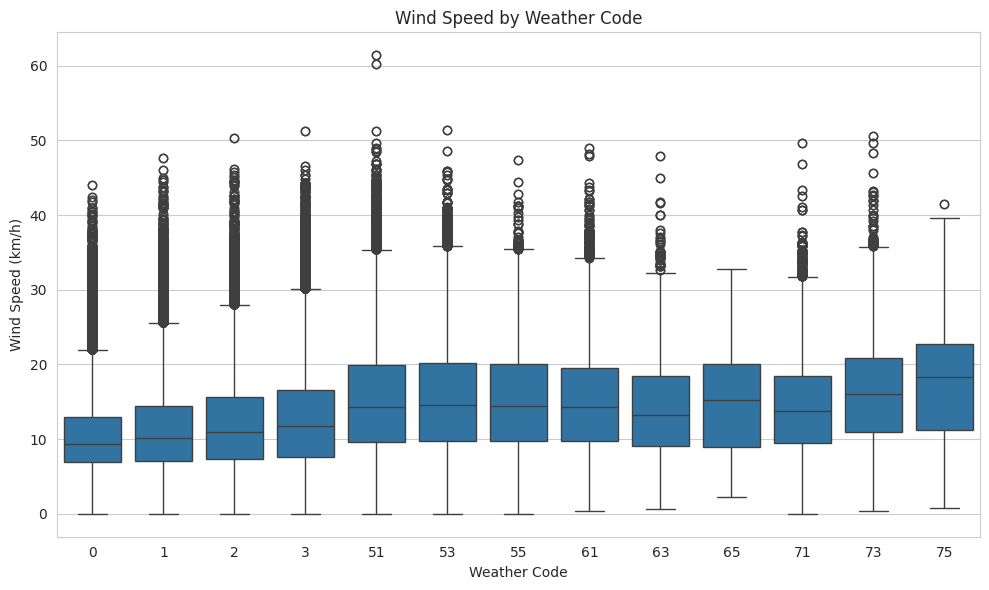

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'time' column to datetime if not already done
df['time'] = pd.to_datetime(df['time'])

# Set the style of the visualization
sns.set_style("whitegrid")

# Plot 1: Time series plot of temperature
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['temperature_2m (°C)'], label='Temperature (°C)', color='tab:red')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Distribution of humidity
plt.figure(figsize=(10, 6))
sns.histplot(df['relative_humidity_2m (%)'], bins=30, kde=True, color='tab:blue')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')
plt.title('Distribution of Relative Humidity')
plt.tight_layout()
plt.show()

# Plot 3: Scatter plot of temperature vs. apparent temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature_2m (°C)', y='apparent_temperature (°C)', data=df, hue='weather_code (wmo code)', palette='viridis')
plt.xlabel('Temperature (°C)')
plt.ylabel('Apparent Temperature (°C)')
plt.title('Temperature vs. Apparent Temperature')
plt.legend(title='Weather Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot 4: Box plot of wind speed by weather code
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_code (wmo code)', y='wind_speed_10m (km/h)', data=df)
plt.xlabel('Weather Code')
plt.ylabel('Wind Speed (km/h)')
plt.title('Wind Speed by Weather Code')
plt.tight_layout()
plt.show() 

In [ ]:
# Ensure the 'Date_Time' column is of string type
df['time'] = df['time'].astype(str)

# Split the 'Date_Time' column into 'Date' and 'Time' columns
df[['Date', 'Time']] = df['time'].str.split(' ', expand=True)

# Extract the month number from the 'Date' column
df['Month_num'] = df['Date'].str.split("-", expand=True)[1]

# Dictionary to map month numbers to month names
months = {
    '01': "January", '02': "February", '03': "March",
    '04': "April", '05': "May", '06': "June",
    '07': "July", '08': "August", '09': "September",
    '10': "October", '11': "November", '12': "December"
}

# Function to convert month number to month name
def convert_mon(x):
    return months.get(x)

# Apply the function to create a new 'month' column with month names
df['month'] = df['Month_num'].apply(lambda x: convert_mon(x))

# Check the resulting DataFrame
#print(df)


         location_id                 time  temperature_2m (°C)  \
0                  0  2010-01-01 00:00:00                 -2.5   
1                  0  2010-01-01 01:00:00                 -2.6   
2                  0  2010-01-01 02:00:00                 -2.7   
3                  0  2010-01-01 03:00:00                 -2.7   
4                  0  2010-01-01 04:00:00                 -2.7   
...              ...                  ...                  ...   
1263115            4  2024-05-29 19:00:00                 21.3   
1263116            4  2024-05-29 20:00:00                 19.6   
1263117            4  2024-05-29 21:00:00                 16.9   
1263118            4  2024-05-29 22:00:00                 16.1   
1263119            4  2024-05-29 23:00:00                 16.0   

         relative_humidity_2m (%)  apparent_temperature (°C)  \
0                            87.0                       -7.5   
1                            87.0                       -7.5   
2              

In [ ]:
df['Hour']= df['Time'].str.split(':', expand=True)[0]

def convert_hour(x):
    if x in ['04','05', '06']:
        x="Dawn"
    elif x in ['07','08','09','10', '11']:
        x="Morning"
    elif x=='12':
        x="Noon"
    elif x in['13', '14', '15', '16']:
        x="AfterNoon"
    elif x in ['17', '18', '19']:
        x="Evening"
    else:
        x="Night"
    return x

df['Time of day']= df['Hour'].apply(lambda x: convert_hour(x))

df.head()

,location_id,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),precipitation (mm),weather_code (wmo code),wind_speed_10m (km/h),Place,Date,Time,Month_num,month,Hour,Time of day
0,0,2010-01-01 00:00:00,-2.5,87.0,-7.5,0.3,73,15.8,Berlin,2010-01-01,00:00:00,01,January,00,Night
1,0,2010-01-01 01:00:00,-2.6,87.0,-7.5,0.4,73,14.8,Berlin,2010-01-01,01:00:00,01,January,01,Night
2,0,2010-01-01 02:00:00,-2.7,88.0,-7.7,0.5,73,16.0,Berlin,2010-01-01,02:00:00,01,January,02,Night
3,0,2010-01-01 03:00:00,-2.7,88.0,-7.8,0.5,73,16.3,Berlin,2010-01-01,03:00:00,01,January,03,Night
4,0,2010-01-01 04:00:00,-2.7,88.0,-7.8,0.4,73,16.3,Berlin,2010-01-01,04:00:00,01,January,04,Dawn


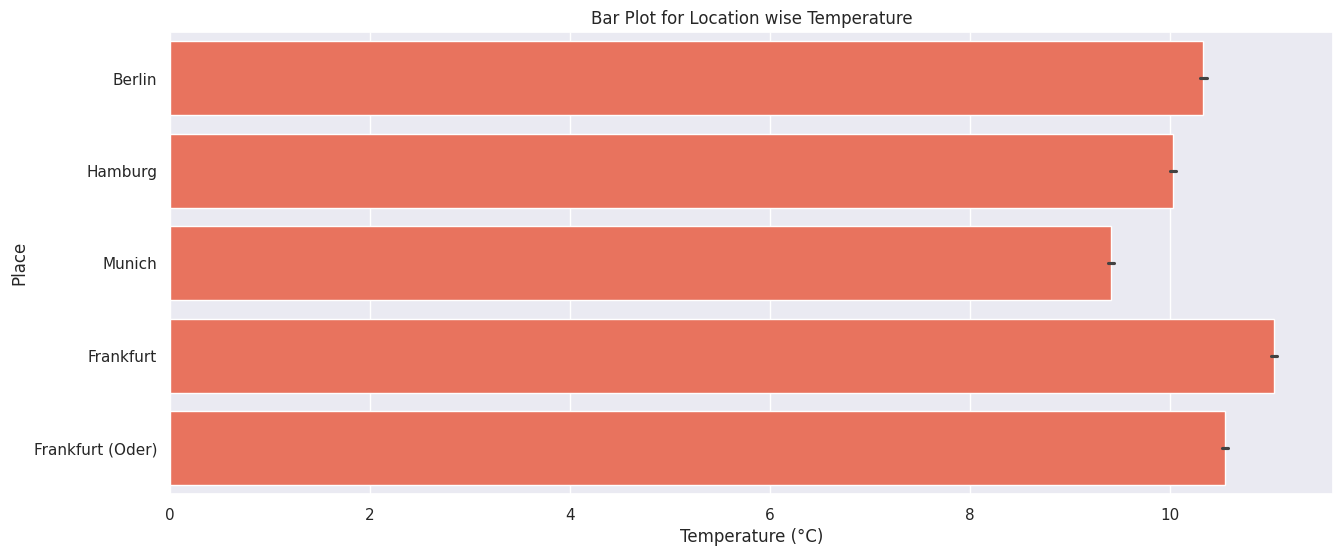

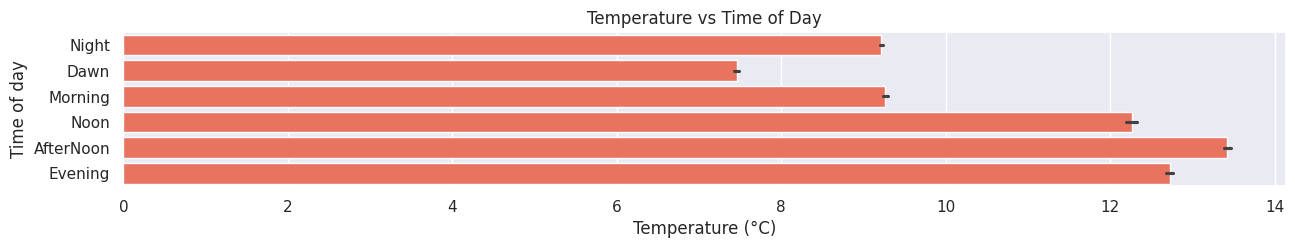

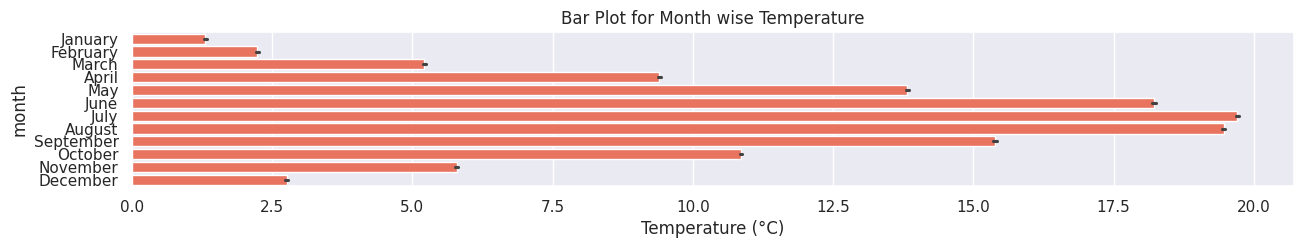

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the theme and custom palette
sns.set_theme(style='darkgrid')
custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']
sns.set_palette(custom_palette)

# Function to create bar plots
def plot_bar(attribute, x_label, y_label, title, figsize=(15, 6)):
    plt.figure(figsize=figsize)
    sns.barplot(x=attribute, y=y_label, data=df)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# Generate specific bar plots
plot_bar('temperature_2m (°C)', 'Temperature (°C)', 'Place', 'Bar Plot for Location wise Temperature', figsize=(15, 6))
plot_bar('temperature_2m (°C)', 'Temperature (°C)', 'Time of day', 'Temperature vs Time of Day', figsize=(15, 2))
plot_bar('temperature_2m (°C)', 'Temperature (°C)', 'month', 'Bar Plot for Month wise Temperature', figsize=(15, 2))


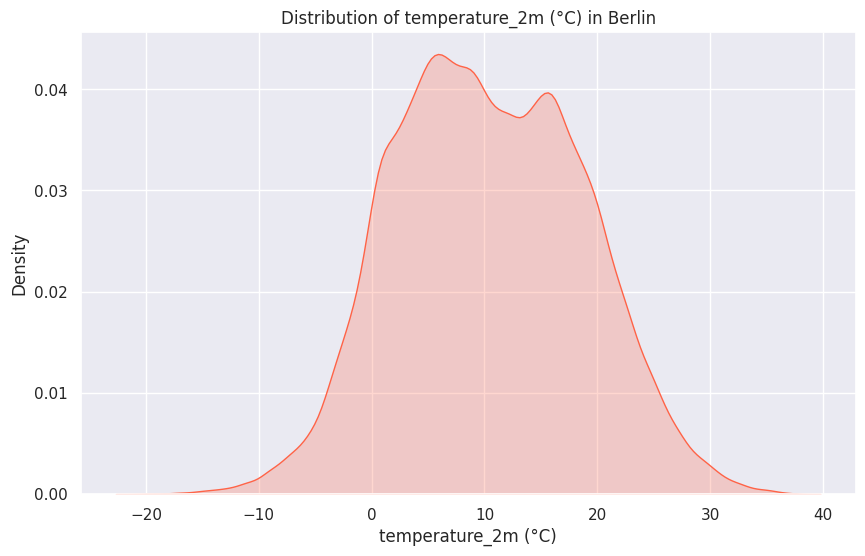

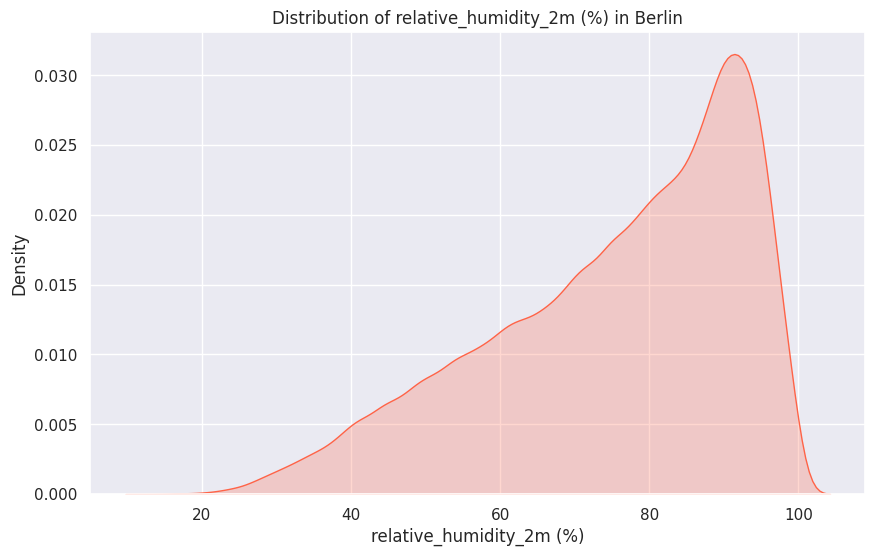

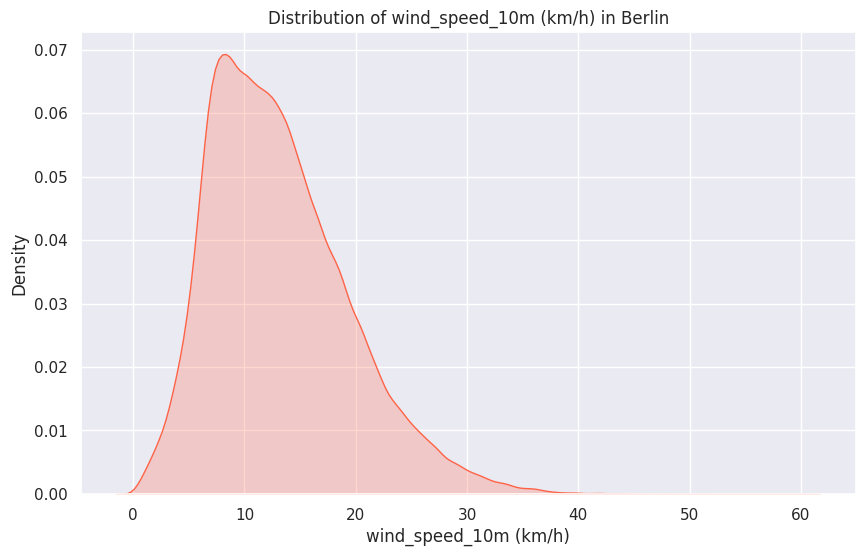

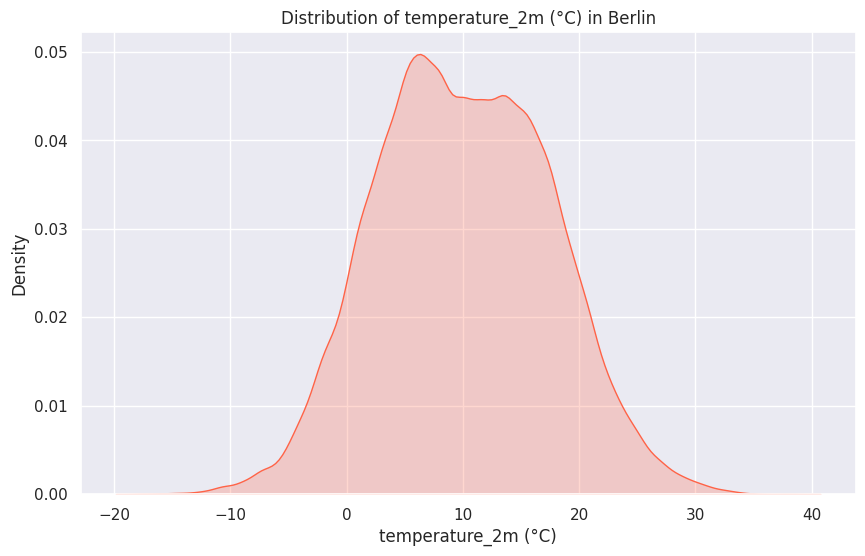

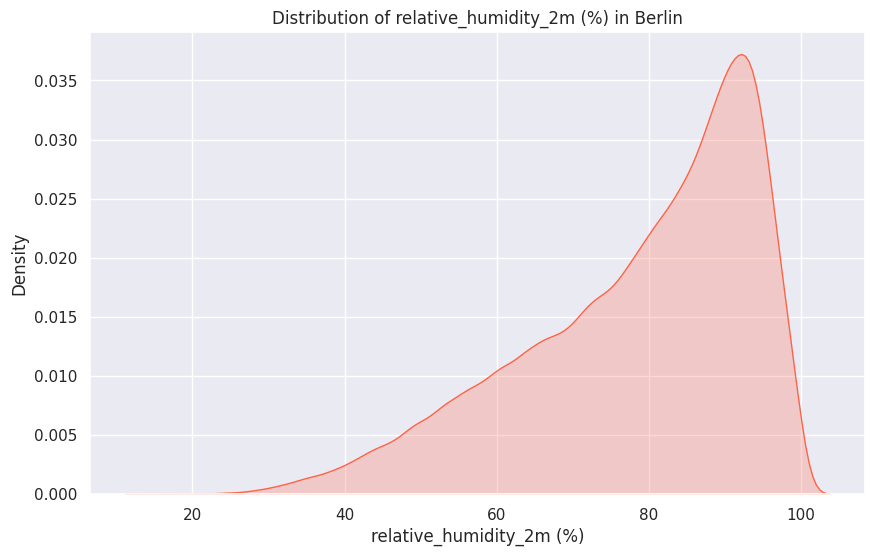

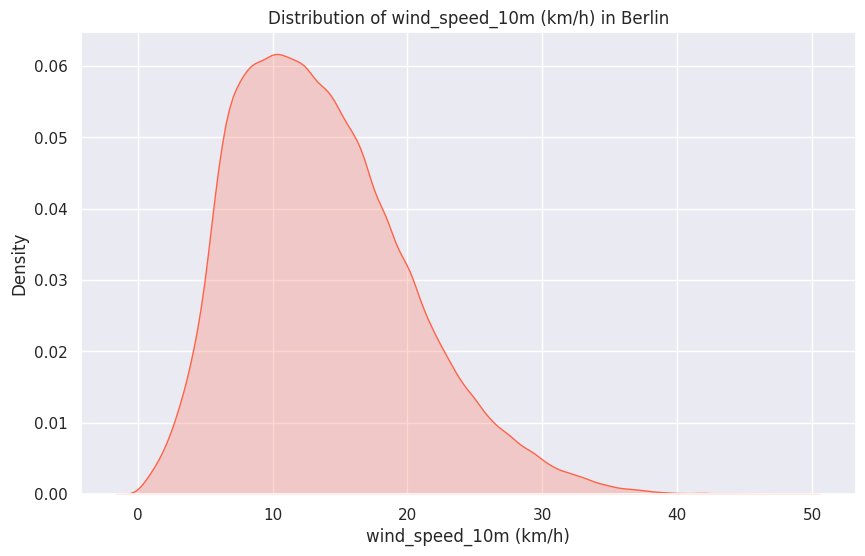

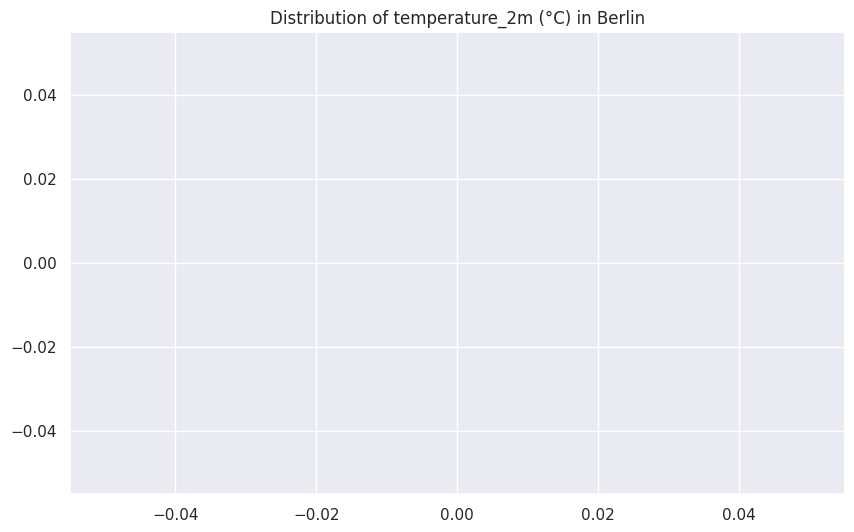

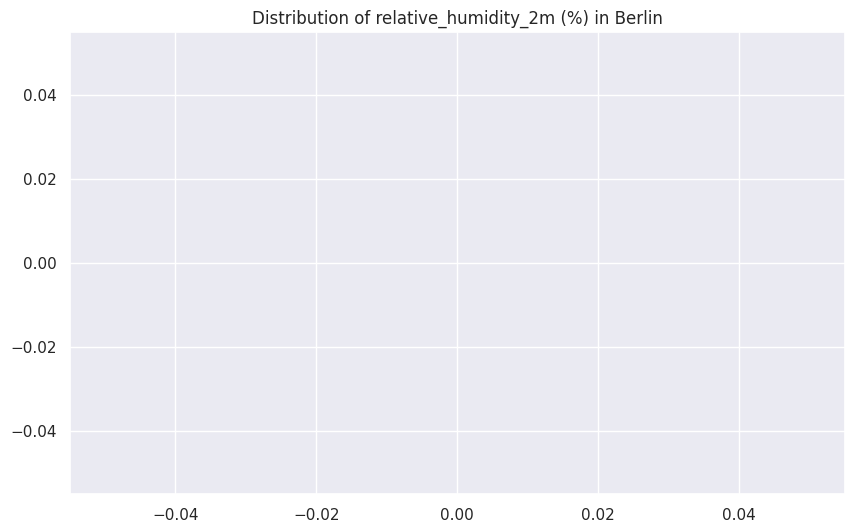

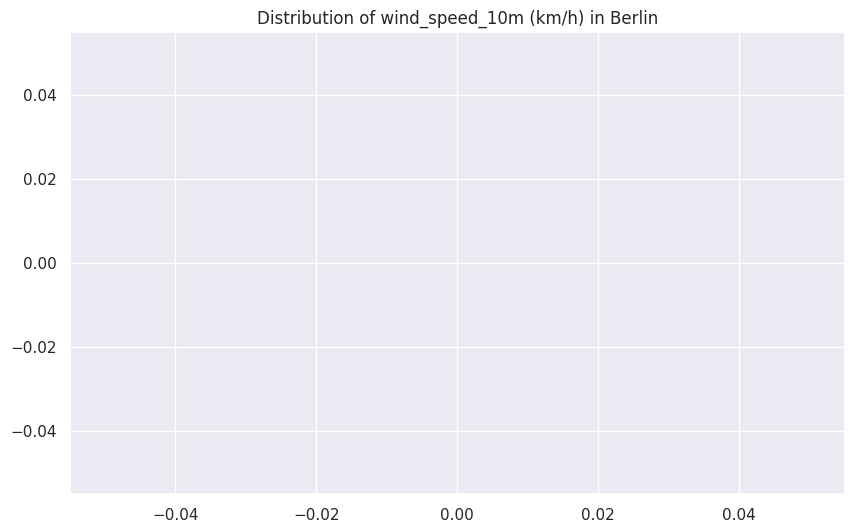

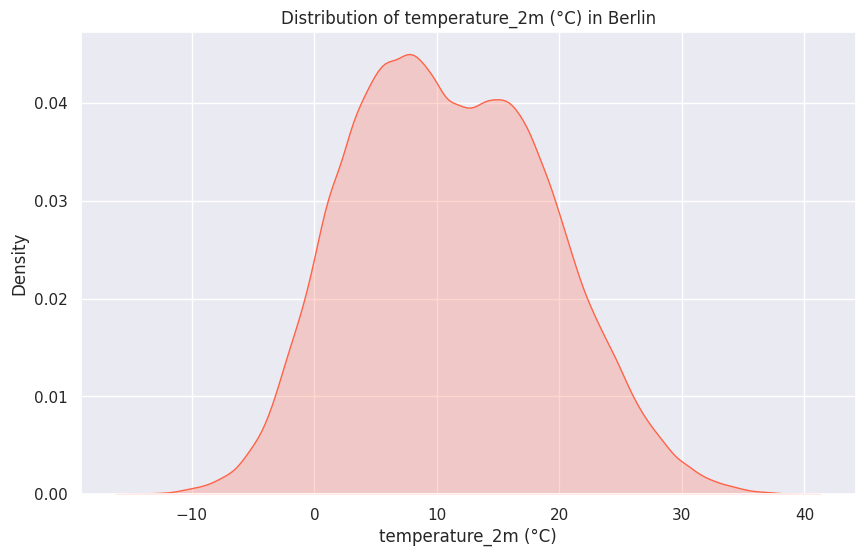

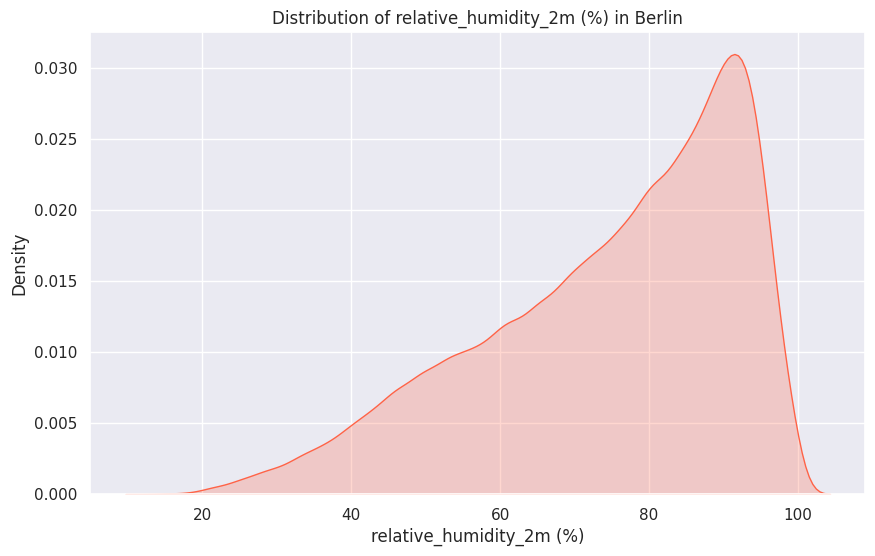

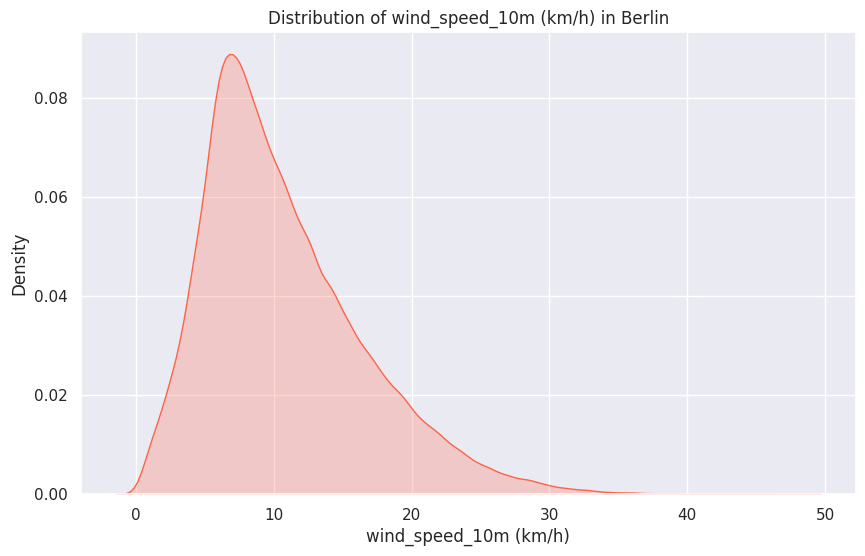

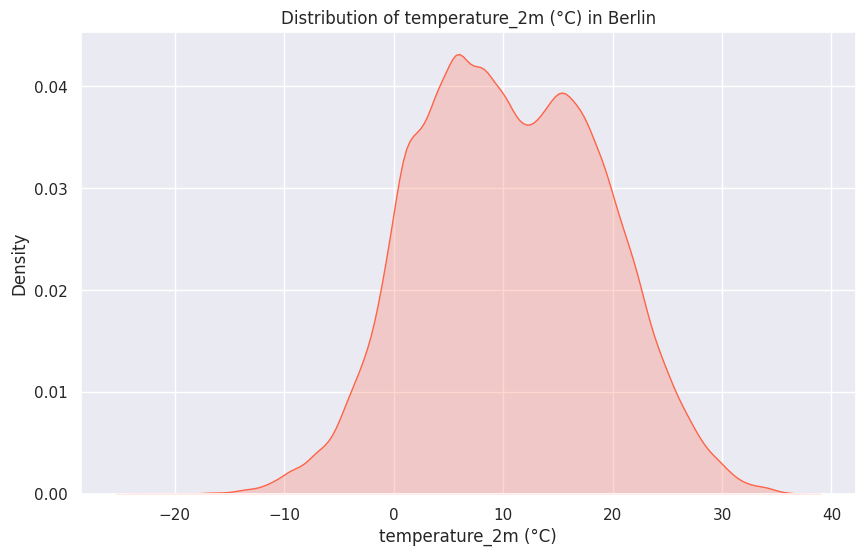

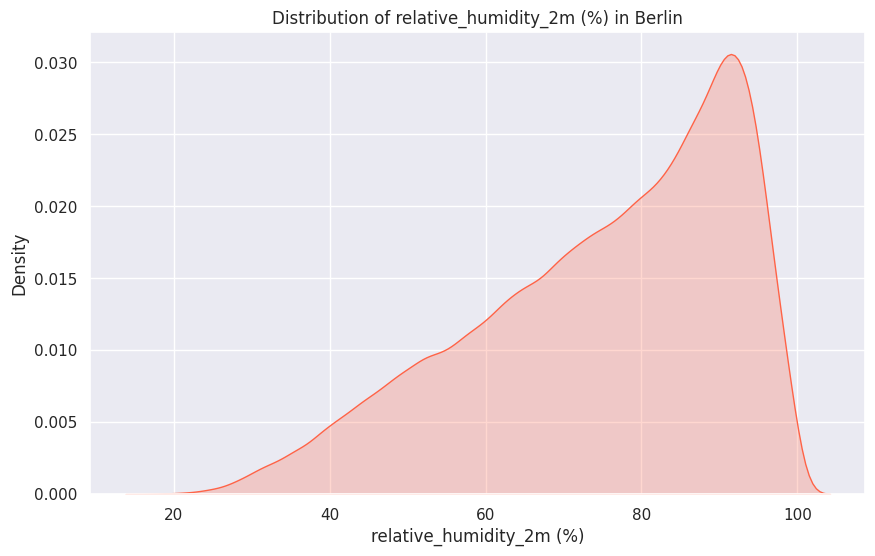

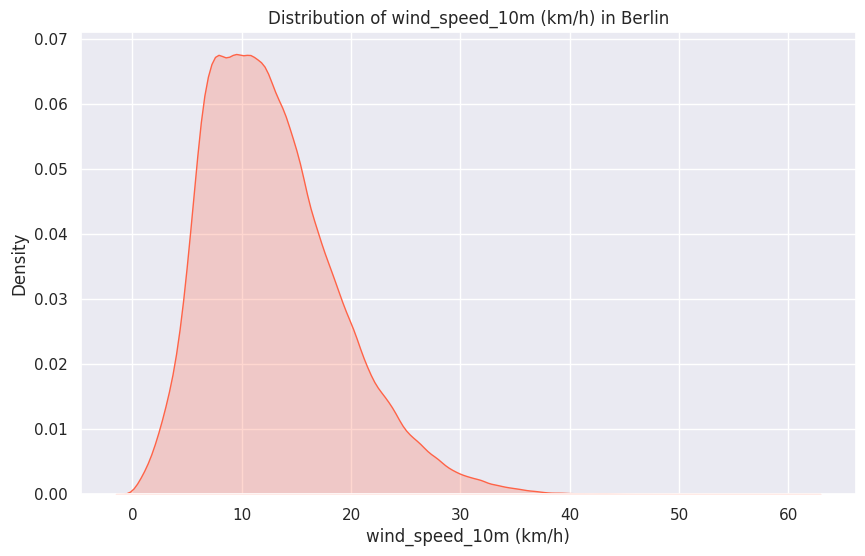

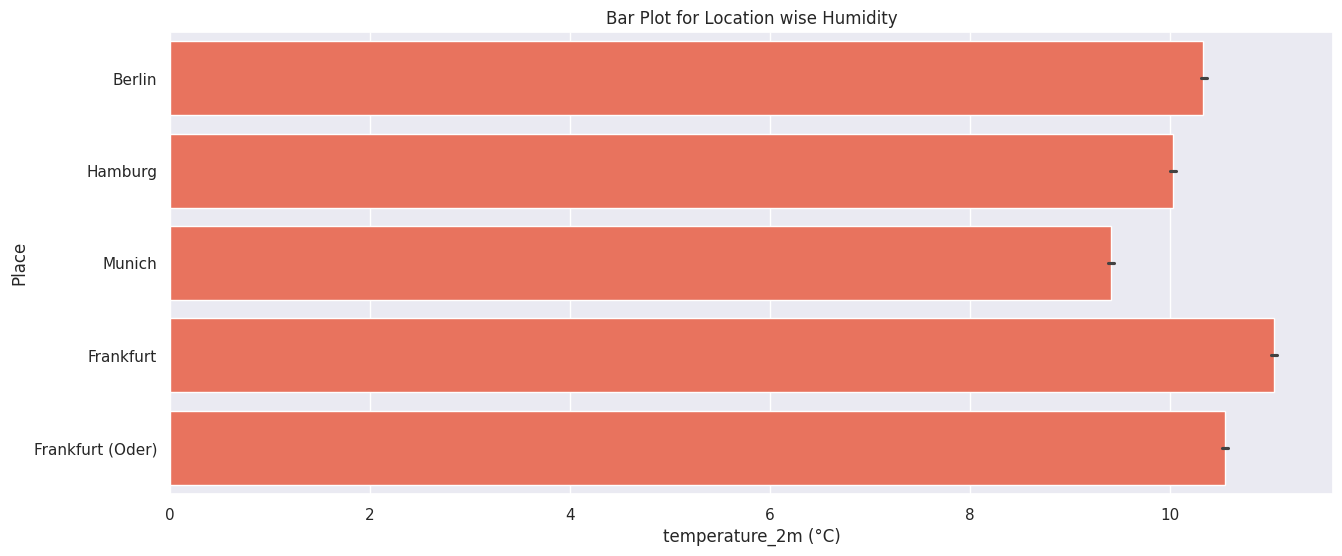

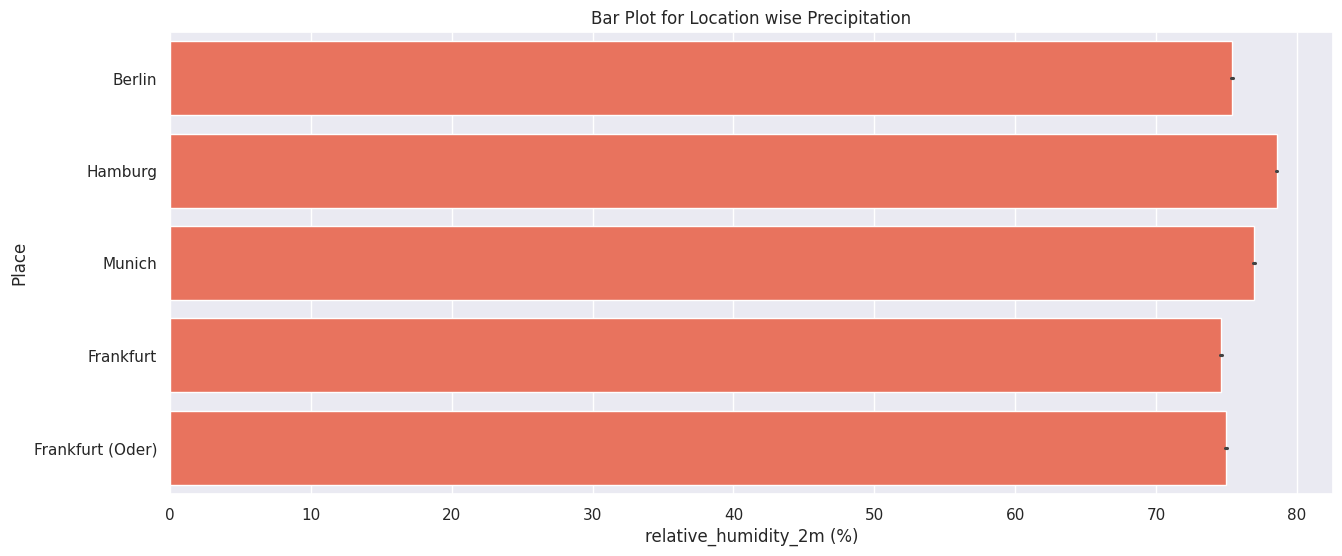

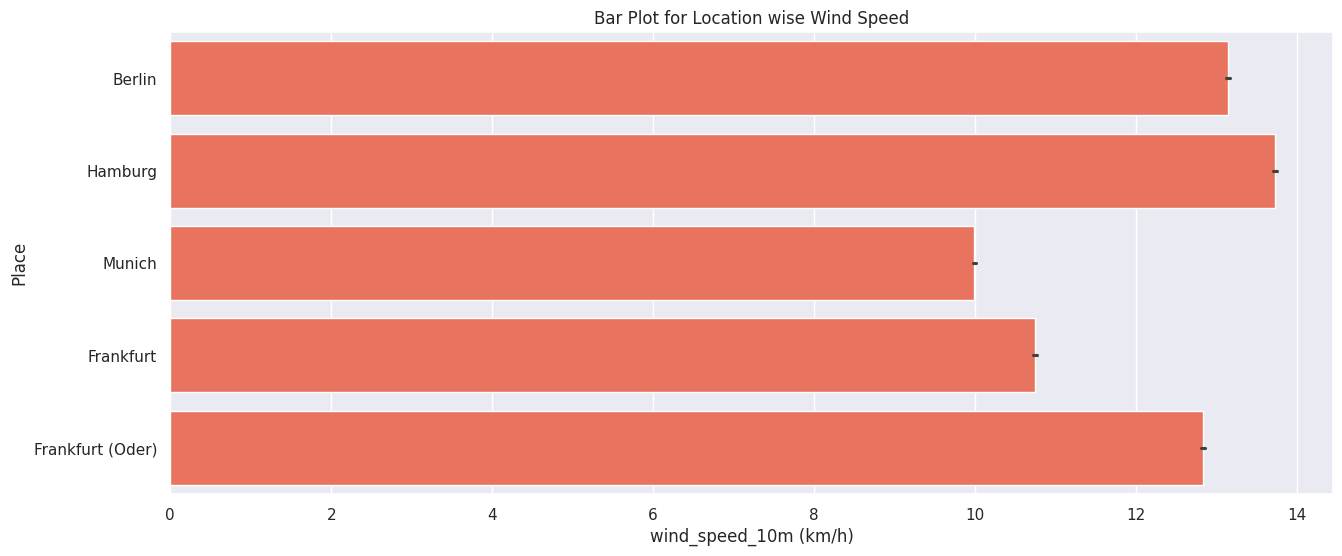

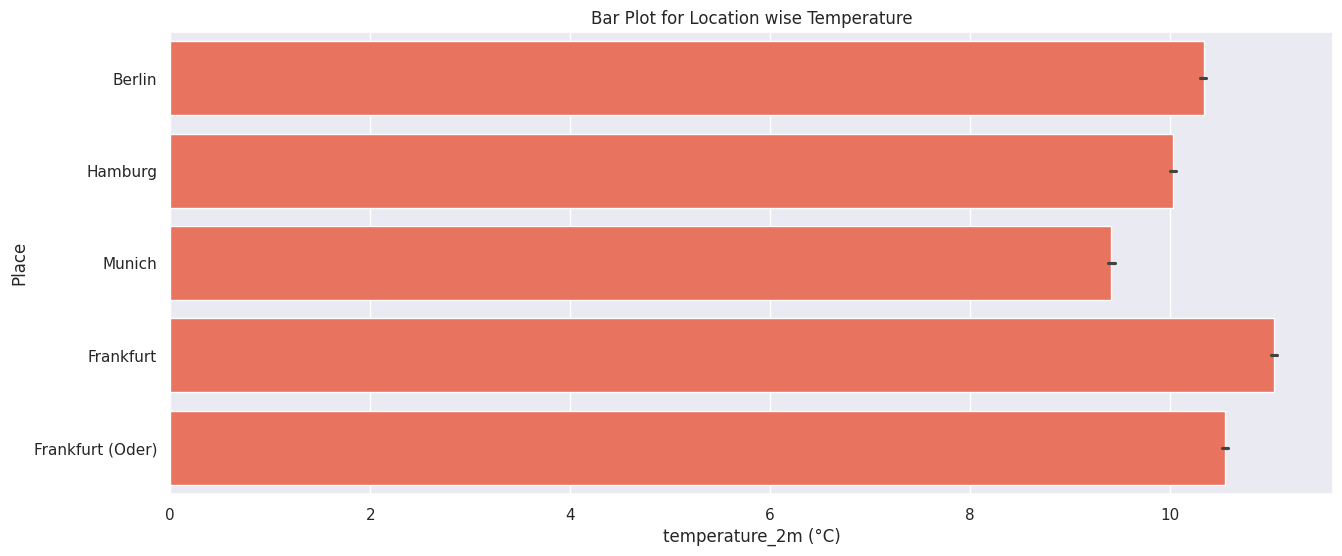

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns




# Setting the theme and custom palette
sns.set_theme(style='darkgrid')
custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']
sns.set_palette(custom_palette)

# Function to create KDE plots
def plot_kde(Place, attribute):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df[df['Place'] == Place][attribute], fill=True)
    plt.title(f'Distribution of {attribute} in {place}')
    plt.show()

# Function to create bar plots
def plot_bar(attribute, title):
    plt.figure(figsize=(15, 6))
    sns.barplot(x=attribute, y='Place', data=df)
    plt.title(title)
    plt.show()

# List of locations and attributes for KDE plots
Place = ['Berlin', 'Hamburg', 'Muncich', 'Frankfurt','Frankfurt (Oder)']
attributes = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'wind_speed_10m (km/h)']

# Generate KDE plots for each location and attribute
for Place in Place:
    for attribute in attributes:
        plot_kde(Place, attribute)

# Generate bar plots for specific attributes
plot_bar('temperature_2m (°C)', 'Bar Plot for Location wise Humidity')
plot_bar('relative_humidity_2m (%)', 'Bar Plot for Location wise Precipitation')
plot_bar('wind_speed_10m (km/h)', 'Bar Plot for Location wise Wind Speed')

# Additional bar plots for Temperature
plot_bar('temperature_2m (°C)', 'Bar Plot for Location wise Temperature')


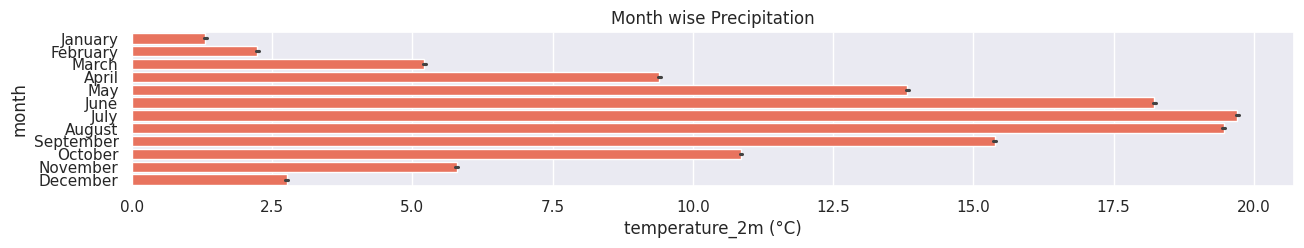

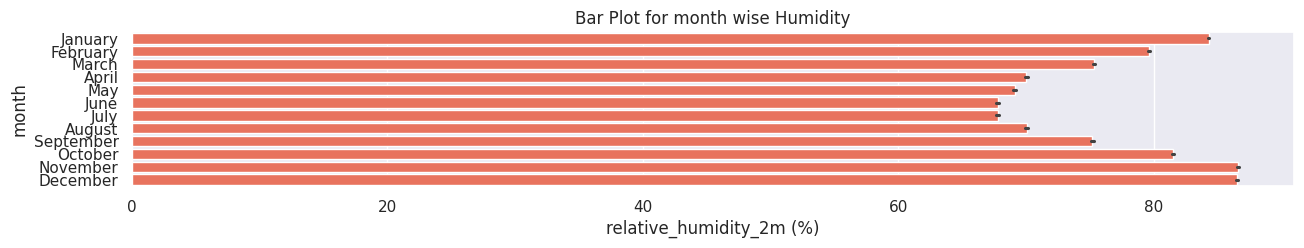

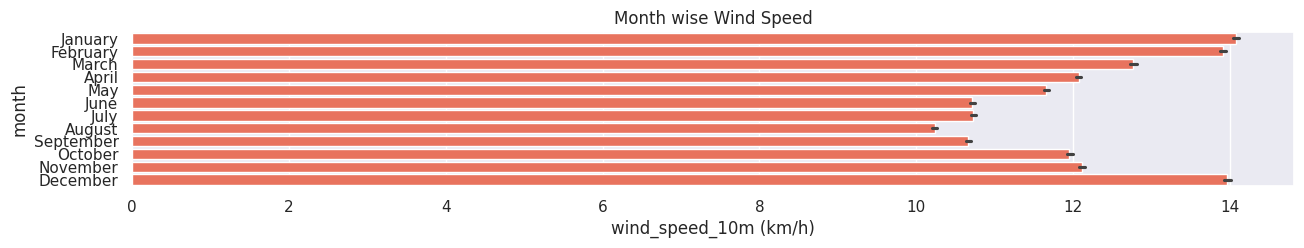

In [ ]:
sns.set_theme(style='darkgrid')
custom_palette = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']
sns.set_palette(custom_palette)


plt.figure(figsize=(15, 2))
sns.barplot(x='temperature_2m (°C)', y='month', data=df)
plt.title('Month wise Precipitation')
plt.show()

plt.figure(figsize=(15, 2))
sns.barplot(x='relative_humidity_2m (%)', y='month', data=df)
plt.title('Bar Plot for month wise Humidity')
plt.show()


plt.figure(figsize=(15, 2))
sns.barplot(x='wind_speed_10m (km/h)', y='month', data=df)
plt.title('Month wise Wind Speed')
plt.show()


In [ ]:
max_temp_index = df['temperature_2m (°C)'].idxmax()
max_temp_location = df.loc[max_temp_index, 'Place']
print(f'The location with the highest temperature is: {max_temp_location}')

min_temp_index = df['temperature_2m (°C)'].idxmin()
min_temp_location = df.loc[min_temp_index, 'Place']
print(f'The Location with the lowest temperature is: {min_temp_location}')


max_Humid_index = df['relative_humidity_2m (%)'].idxmax()
max_Humid_location = df.loc[max_Humid_index, 'Place']
print(f'The location with the highest Humidity is: {max_Humid_location}')

min_Humid_index = df['relative_humidity_2m (%)'].idxmin()
min_Humid_location = df.loc[min_Humid_index, 'Place']
print(f'The location with the lowest Humidity is: {min_Humid_location}')

The location with the highest temperature is: Frankfurt
The Location with the lowest temperature is: Frankfurt (Oder)
The location with the highest Humidity is: Berlin
The location with the lowest Humidity is: Berlin


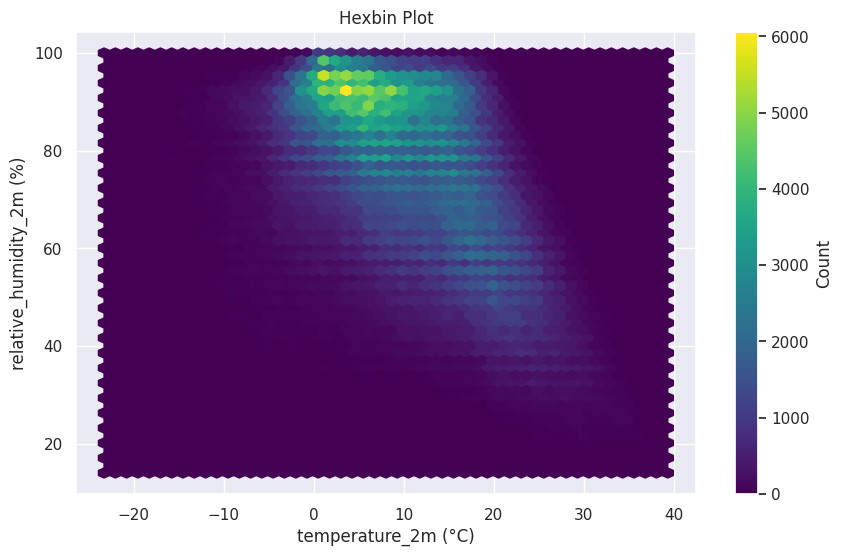

In [ ]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['temperature_2m (°C)'], df['relative_humidity_2m (%)'], gridsize=50, cmap='viridis')
plt.colorbar(label='Count')
plt.title('Hexbin Plot')
plt.xlabel('temperature_2m (°C)')
plt.ylabel('relative_humidity_2m (%)')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Prepare data for machine learning
features = df.drop(['temperature_2m (°C)', 'time'], axis=1)
target = df['temperature_2m (°C)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Train the model
from statistics import LinearRegression


model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)


TypeError: LinearRegression.__new__() missing 2 required positional arguments: 'slope' and 'intercept'

Mean Squared Error: 0.12606654549456509
R-squared: 0.9980844680155382


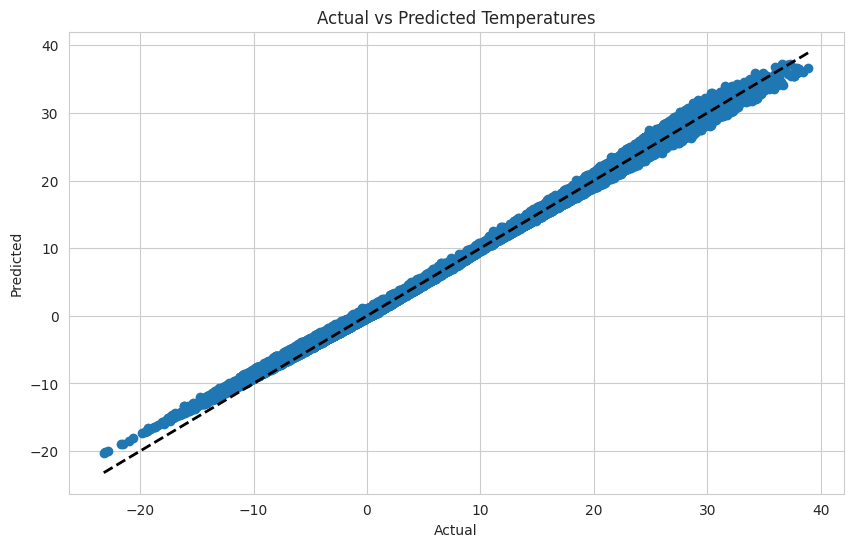

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Temperatures')
plt.show()
